<a href="https://colab.research.google.com/github/raulbenitez/ZUMAIN_course/blob/main/analisis_datos_multivariados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de datos multivariados



## Lectura de datos con Python

Los datos deben ser subidos a la sessión de google colab o accesibles en una carpeta de Google Drive. 

Para subir un fichero de datos a Google Colab havemos lo siguiente:

In [1]:
from google.colab import files 
import io
uploaded = files.upload()

Saving ESTADISTICOS.xlsx to ESTADISTICOS.xlsx


En caso de tener el fichero en una carpeta de nuestro Google Drive, hay que montar la unidad en la sesión de Google Colab ejecutando la siguiente instrucción

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Leemos los datos y los cargamos en una variable del tipo dataframe de la librería Pandas

In [4]:
import pandas as pd
import numpy as np
df = pd.read_excel('ESTADISTICOS.xlsx',header=0)
df.head(5)

,Projecto,Vuelo,Parcela,Numero_pie,Zona,IMAGEN,Afeccion,ID_Unico,RWC,SLA,RNV,PHE,TAN,CLOa,CLOb,CARO,N,C,P,K,Ca,Mg,S,Cl,Si,Î´ 15NAI,Î´ 13CVP,RW2018,RW2017,RW2016,RW2015,RW2014,RW2013,RW2012,RW2011,RW2010,Ergoster,Perfil,N_1,DT01,...,md_Banda_236,sd_Banda_236,md_Banda_237,sd_Banda_237,md_Banda_238,sd_Banda_238,md_Banda_239,sd_Banda_239,md_Banda_240,sd_Banda_240,md_Banda_241,sd_Banda_241,md_Banda_242,sd_Banda_242,md_Banda_243,sd_Banda_243,md_Banda_244,sd_Banda_244,md_Banda_245,sd_Banda_245,md_Banda_246,sd_Banda_246,md_Banda_247,sd_Banda_247,md_Banda_248,sd_Banda_248,md_Banda_249,sd_Banda_249,md_Banda_250,sd_Banda_250,md_Banda_251,sd_Banda_251,md_PC1,sd_PC1,md_PC2,sd_PC2,md_PC3,sd_PC3,md_PC4,sd_PC4
0,Kaudal I,1,PA1,20,Palencia 1,raw_13408,1,1PA120,46.07,88.88,NaN,NaN,NaN,NaN,NaN,NaN,2.226,NaN,1765.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.370371,0.239609,0.624316,0.554729,0.552716,0.635217,0.518936,0.659762,0.383532,NaN,NaN,NaN,NaN,...,0.433732,0.031652,0.434195,0.029501,0.433622,0.029035,0.433361,0.024241,0.431977,0.022191,0.429215,0.017940,0.428826,0.019257,0.432067,0.017315,0.435539,0.019088,0.432166,0.018010,0.433252,0.018976,0.432435,0.017127,0.430390,0.018196,0.432441,0.016994,0.430791,0.018077,0.429400,0.017271,20.386370,2.241950,NaN,NaN,NaN,NaN,NaN,NaN
1,Kaudal I,1,PA1,1,Palencia 1,raw_13408,1,1PA11,48.96,101.08,NaN,NaN,NaN,NaN,NaN,NaN,1.763,NaN,2051.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.877088,0.526232,0.761613,0.873261,0.552874,0.773410,0.753700,0.697968,0.788073,NaN,NaN,NaN,NaN,...,0.425856,0.020303,0.427453,0.020234,0.425998,0.019020,0.429250,0.015973,0.433349,0.014969,0.435198,0.012955,0.431695,0.013020,0.434648,0.012512,0.433423,0.012753,0.430950,0.012460,0.431788,0.012787,0.435219,0.011817,0.428699,0.012076,0.433668,0.012379,0.430397,0.012407,0.429887,0.013447,19.571127,1.747279,NaN,NaN,NaN,NaN,NaN,NaN
2,Kaudal I,1,PA1,4,Palencia 1,raw_13408,1,1PA14,51.33,140.31,NaN,NaN,NaN,NaN,NaN,NaN,2.624,NaN,1986.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.273419,1.813924,1.487726,0.890698,1.301215,1.458398,1.008350,0.903829,1.199661,NaN,NaN,NaN,NaN,...,0.446528,0.026131,0.444909,0.024699,0.442931,0.023187,0.440854,0.019926,0.443019,0.018066,0.438906,0.015009,0.441692,0.015039,0.441390,0.015125,0.446002,0.015843,0.441799,0.015644,0.442963,0.014828,0.443226,0.013914,0.440594,0.014318,0.443856,0.014632,0.442598,0.014629,0.438628,0.015165,22.576169,2.835996,NaN,NaN,NaN,NaN,NaN,NaN
3,Kaudal I,1,PA1,6,Palencia 1,raw_13408,1,1PA16,47.23,101.27,NaN,NaN,NaN,NaN,NaN,NaN,1.732,NaN,1785.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.347636,0.291534,0.276043,0.358380,0.239601,0.420981,0.512240,0.420161,0.329300,NaN,NaN,NaN,NaN,...,0.445586,0.025739,0.442597,0.023991,0.441856,0.022715,0.437602,0.019766,0.439494,0.017640,0.435101,0.014769,0.439206,0.013599,0.440598,0.013506,0.443893,0.015111,0.439104,0.014138,0.441078,0.014770,0.439510,0.014086,0.440116,0.013870,0.440462,0.013424,0.439987,0.014178,0.436359,0.014038,22.141045,2.229509,NaN,NaN,NaN,NaN,NaN,NaN
4,Kaudal I,1,PA1,9,Palencia 1,raw_13408,1,1PA19,56.23,91.70,NaN,NaN,NaN,NaN,NaN,NaN,2.015,NaN,1876.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.266104,0.227464,0.624793,0.225906,0.385369,0.349394,0.320325,0.249957,0.231170,NaN,NaN,NaN,NaN,...,0.389827,0.010884,0.393880,0.013856,0.392737,0.012206,0.402364,0.011447,0.407680,0.009977,0.412839,0.010102,0.411619,0.010234,0.414561,0.009179,0.411464,0.009520,0.413211,0.009371,0.409894,0.010178,0.416278,0.010410,0.411576,0.009810,0.417156,0.009113,0.411803,0.010920,0.411202,0.012521,18.146144,1.087736,NaN,NaN,NaN,NaN,NaN,NaN


Consultar valores en variables categóricas:

In [7]:
df['Numero_pie'].unique()

array([20,  1,  4,  6,  9, 10, 17,  5,  2,  7,  8,  3, 11, 18, 16, 12, 28,
       14, 21, 24, 25, 15, 13, 22, 32, 19])

Consultamos las columnas del dataframe

In [8]:
df.columns

Index(['Projecto', 'Vuelo', 'Parcela', 'Numero_pie', 'Zona', 'IMAGEN',
       'Afeccion', 'ID_Unico', 'RWC', 'SLA',
       ...
       'md_Banda_251', 'sd_Banda_251', 'md_PC1', 'sd_PC1', 'md_PC2', 'sd_PC2',
       'md_PC3', 'sd_PC3', 'md_PC4', 'sd_PC4'],
      dtype='object', length=588)

In [9]:
df.describe()

,Vuelo,Numero_pie,Afeccion,RWC,SLA,RNV,PHE,TAN,CLOa,CLOb,CARO,N,C,P,K,Ca,Mg,S,Cl,Si,Î´ 15NAI,Î´ 13CVP,RW2018,RW2017,RW2016,RW2015,RW2014,RW2013,RW2012,RW2011,RW2010,Ergoster,N_1,DT01,DT02,DT03,DT04,DT05,DT06,DT07,...,md_Banda_236,sd_Banda_236,md_Banda_237,sd_Banda_237,md_Banda_238,sd_Banda_238,md_Banda_239,sd_Banda_239,md_Banda_240,sd_Banda_240,md_Banda_241,sd_Banda_241,md_Banda_242,sd_Banda_242,md_Banda_243,sd_Banda_243,md_Banda_244,sd_Banda_244,md_Banda_245,sd_Banda_245,md_Banda_246,sd_Banda_246,md_Banda_247,sd_Banda_247,md_Banda_248,sd_Banda_248,md_Banda_249,sd_Banda_249,md_Banda_250,sd_Banda_250,md_Banda_251,sd_Banda_251,md_PC1,sd_PC1,md_PC2,sd_PC2,md_PC3,sd_PC3,md_PC4,sd_PC4
count,673.000000,673.000000,673.000000,673.000000,673.000000,421.000000,421.000000,421.000000,169.000000,169.000000,169.000000,673.000000,448.000000,673.000000,448.000000,448.000000,448.000000,98.000000,98.000000,98.000000,336.000000,336.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,111.000000,169.000000,148.000000,113.000000,150.000000,169.000000,169.000000,113.000000,169.000000,...,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,61.000000,61.000000,0.0,0.0,0.0,0.0
mean,3.496285,9.463596,0.625557,69.027137,62.239431,32.009827,12.939915,24.129033,0.595427,0.378813,0.123124,1.275274,50.284797,1165.261540,3110.359217,2161.643651,2231.497237,807.378469,213.570510,776.534796,-0.987313,-26.945664,1.246075,0.818132,1.309370,1.135253,1.280116,1.320659,1.116734,1.410615,1.424896,2.516198,4046.473373,1.130052,0.763002,0.603611,0.413225,0.599869,0.999716,7.832811,...,0.416796,0.029488,0.418227,0.027308,0.418780,0.026473,0.421681,0.022301,0.421631,0.020763,0.423366,0.017305,0.423946,0.017832,0.423858,0.016986,0.423630,0.018286,0.424644,0.017124,0.423579,0.017657,0.423458,0.016112,0.423252,0.017231,0.423043,0.016190,0.422361,0.016981,0.422253,0.015956,31.749412,3.659628,0.065391,1.813777,NaN,NaN,NaN,NaN
std,1.710542,6.985887,0.484339,20.836841,29.461688,12.248021,4.626881,13.969674,0.503187,0.240404,0.103357,0.686945,5.190092,510.865839,2654.426949,1818.297013,2610.087617,188.533597,84.832722,1298.677877,1.181215,2.206004,0.735331,0.582920,0.702462,0.685898,0.834298,0.872228,0.761589,0.953076,1.005595,5.419994,1722.371790,1.768041,1.361816,0.964193,0.506314,0.653814,1.767392,17.796285,...,0.048181,0.011038,0.046446,0.010325,0.044840,0.009551,0.041530,0.008023,0.040179,0.006743,0.038538,0.005709,0.038643,0.005792,0.037869,0.005922,0.038763,0.006099,0.038527,0.005785,0.038457,0.005671,0.037714,0.005382,0.038307,0.005467,0.037568,0.005260,0.038185,0.005227,0.037905,0.005079,9.493912,1.257512,1.923001,0.547928,NaN,NaN,NaN,NaN
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.102900,0.084700,0.018700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,562.600000,61.800000,105.800000,-3.834000,-29.351000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.671316,0.346016,NaN,NaN,NaN,NaN
25%,2.000000,4.000000,0.000000,46.480000,38.840000,22.774189,9.548804,15.088835,0.237200,0.182000,0.049700,0.677000,48.793215,738.000000,1242.389250,1126.000000,975.675000,656.450000,142.975000,155.375000,-1.672000,-27.542000,0.707174,0.367307,0.760189,0.623042,0.

Missing data report

In [10]:
# Count total NaN at each column in a DataFrame
df.isna().sum()

Projecto        0
Vuelo           0
Parcela         0
Numero_pie      0
Zona            0
             ... 
sd_PC2        612
md_PC3        673
sd_PC3        673
md_PC4        673
sd_PC4        673
Length: 588, dtype: int64

### Filtrado de datos

Generar un nuevo dataframe con las observaciones que presentan un valor de la columna RWC superior a la media de esa variable:

In [11]:
df['RWC'].mean()

69.02713675474003

In [14]:
df1 = df.loc[df['RWC']>df['RWC'].mean()]
df1.head()

,Projecto,Vuelo,Parcela,Numero_pie,Zona,IMAGEN,Afeccion,ID_Unico,RWC,SLA,RNV,PHE,TAN,CLOa,CLOb,CARO,N,C,P,K,Ca,Mg,S,Cl,Si,Î´ 15NAI,Î´ 13CVP,RW2018,RW2017,RW2016,RW2015,RW2014,RW2013,RW2012,RW2011,RW2010,Ergoster,Perfil,N_1,DT01,...,md_Banda_236,sd_Banda_236,md_Banda_237,sd_Banda_237,md_Banda_238,sd_Banda_238,md_Banda_239,sd_Banda_239,md_Banda_240,sd_Banda_240,md_Banda_241,sd_Banda_241,md_Banda_242,sd_Banda_242,md_Banda_243,sd_Banda_243,md_Banda_244,sd_Banda_244,md_Banda_245,sd_Banda_245,md_Banda_246,sd_Banda_246,md_Banda_247,sd_Banda_247,md_Banda_248,sd_Banda_248,md_Banda_249,sd_Banda_249,md_Banda_250,sd_Banda_250,md_Banda_251,sd_Banda_251,md_PC1,sd_PC1,md_PC2,sd_PC2,md_PC3,sd_PC3,md_PC4,sd_PC4
28,Kaudal I,1,S1,1,Segovia,raw_1184,1,1S11,84.62,45.97,9.107,16.216,24.706,1.2647,0.6555,0.2640,1.358,NaN,1734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.113143,2.425153,2.830946,2.954064,2.787862,2.879144,2.683061,2.705759,2.427779,NaN,D,3121.0,0.0,...,0.386793,0.021089,0.387702,0.019341,0.388424,0.019575,0.397568,0.016806,0.397362,0.016587,0.408188,0.014378,0.404998,0.014818,0.408904,0.013816,0.402083,0.014833,0.410036,0.014092,0.404103,0.014890,0.409232,0.013613,0.401958,0.014138,0.409440,0.013867,0.405946,0.014377,0.409227,0.012997,30.815768,3.000246,NaN,NaN,NaN,NaN,NaN,NaN
29,Kaudal I,1,S1,9,Segovia,raw_1184,1,1S19,100.00,63.69,9.226,18.225,23.487,1.7786,0.9016,0.3694,1.236,NaN,1581.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.607970,0.219207,1.614052,1.323967,1.270962,1.138470,1.044699,2.232966,2.430802,NaN,D,3123.0,0.0,...,0.385500,0.020808,0.388053,0.019460,0.387560,0.019733,0.398830,0.017467,0.398427,0.016499,0.410263,0.014615,0.405321,0.015187,0.409380,0.014196,0.401800,0.014226,0.410575,0.014396,0.404621,0.014325,0.409539,0.013257,0.404436,0.014102,0.409177,0.013478,0.404702,0.013753,0.410662,0.012904,30.628319,3.216425,NaN,NaN,NaN,NaN,NaN,NaN
30,Kaudal I,1,S1,18,Segovia,raw_1184,1,1S118,82.50,65.25,14.016,21.344,37.547,1.6854,0.8202,0.3785,1.484,NaN,1248.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.557323,0.077496,0.864360,0.599306,0.693252,0.727482,0.446332,0.984321,1.182122,NaN,D,2051.0,0.0,...,0.385128,0.022792,0.385297,0.019851,0.386417,0.020485,0.393962,0.017335,0.396620,0.017141,0.406863,0.014067,0.404227,0.015435,0.406896,0.014084,0.402839,0.015226,0.408252,0.013306,0.404350,0.014602,0.407752,0.012881,0.404190,0.014133,0.406715,0.012586,0.406328,0.013966,0.407825,0.012240,30.180505,3.423233,NaN,NaN,NaN,NaN,NaN,NaN
31,Kaudal I,1,S1,20,Segovia,raw_1184,1,1S120,85.26,54.46,13.473,24.071,47.670,1.7043,0.8523,0.3885,1.630,NaN,1651.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.079707,0.927432,1.027177,0.895636,0.489290,0.843103,1.688312,1.922349,1.340772,NaN,D,1016.0,0.0,...,0.382817,0.022240,0.383066,0.020059,0.385613,0.020240,0.392110,0.017115,0.395686,0.017018,0.405418,0.014494,0.403516,0.015181,0.405070,0.013922,0.401379,0.014484,0.406944,0.013619,0.403007,0.014530,0.405864,0.013424,0.402591,0.014354,0.406221,0.012644,0.405455,0.013425,0.407534,0.012558,29.223937,2.957811,NaN,NaN,NaN,NaN,NaN,NaN
32,Kaudal I,1,S1,16,Segovia,raw_1184,1,1S116,87.00,84.98,12.524,15.235,22.750,1.3403,0.8482,0.2797,1.706,NaN,1617.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.494764,0.706836,0.707174,0.252716,0.214912,0.328364,0.862278,0.740377,0.641406,NaN,D,1020.0,0.0,...,0.390605,0.021022,0.390605,0.020085,0.392048,0.018915,0.400538,0.016478,0.402743,0.016513,0.411257,0.014061,0.409130,0.014470,0.410633,0.013034,0.405247,0.014392,0.411611,0.013383,0.408266,0.014815,0.411626,0.012891,0.407239,0.013739,0.411496,0.012484,0.410155,0.013513,0.411582,0.013168,30.581841,2.943718,NaN,NaN,NaN,NaN,NaN,NaN


Filtramos las observaciones de la Zona Palencia 1:

In [15]:
df_P1 = df.loc[df['Zona']=='Palencia 1']
df_P1.head()

,Projecto,Vuelo,Parcela,Numero_pie,Zona,IMAGEN,Afeccion,ID_Unico,RWC,SLA,RNV,PHE,TAN,CLOa,CLOb,CARO,N,C,P,K,Ca,Mg,S,Cl,Si,Î´ 15NAI,Î´ 13CVP,RW2018,RW2017,RW2016,RW2015,RW2014,RW2013,RW2012,RW2011,RW2010,Ergoster,Perfil,N_1,DT01,...,md_Banda_236,sd_Banda_236,md_Banda_237,sd_Banda_237,md_Banda_238,sd_Banda_238,md_Banda_239,sd_Banda_239,md_Banda_240,sd_Banda_240,md_Banda_241,sd_Banda_241,md_Banda_242,sd_Banda_242,md_Banda_243,sd_Banda_243,md_Banda_244,sd_Banda_244,md_Banda_245,sd_Banda_245,md_Banda_246,sd_Banda_246,md_Banda_247,sd_Banda_247,md_Banda_248,sd_Banda_248,md_Banda_249,sd_Banda_249,md_Banda_250,sd_Banda_250,md_Banda_251,sd_Banda_251,md_PC1,sd_PC1,md_PC2,sd_PC2,md_PC3,sd_PC3,md_PC4,sd_PC4
0,Kaudal I,1,PA1,20,Palencia 1,raw_13408,1,1PA120,46.07,88.88,NaN,NaN,NaN,NaN,NaN,NaN,2.226,NaN,1765.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.370371,0.239609,0.624316,0.554729,0.552716,0.635217,0.518936,0.659762,0.383532,NaN,NaN,NaN,NaN,...,0.433732,0.031652,0.434195,0.029501,0.433622,0.029035,0.433361,0.024241,0.431977,0.022191,0.429215,0.017940,0.428826,0.019257,0.432067,0.017315,0.435539,0.019088,0.432166,0.018010,0.433252,0.018976,0.432435,0.017127,0.430390,0.018196,0.432441,0.016994,0.430791,0.018077,0.429400,0.017271,20.386370,2.241950,NaN,NaN,NaN,NaN,NaN,NaN
1,Kaudal I,1,PA1,1,Palencia 1,raw_13408,1,1PA11,48.96,101.08,NaN,NaN,NaN,NaN,NaN,NaN,1.763,NaN,2051.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.877088,0.526232,0.761613,0.873261,0.552874,0.773410,0.753700,0.697968,0.788073,NaN,NaN,NaN,NaN,...,0.425856,0.020303,0.427453,0.020234,0.425998,0.019020,0.429250,0.015973,0.433349,0.014969,0.435198,0.012955,0.431695,0.013020,0.434648,0.012512,0.433423,0.012753,0.430950,0.012460,0.431788,0.012787,0.435219,0.011817,0.428699,0.012076,0.433668,0.012379,0.430397,0.012407,0.429887,0.013447,19.571127,1.747279,NaN,NaN,NaN,NaN,NaN,NaN
2,Kaudal I,1,PA1,4,Palencia 1,raw_13408,1,1PA14,51.33,140.31,NaN,NaN,NaN,NaN,NaN,NaN,2.624,NaN,1986.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.273419,1.813924,1.487726,0.890698,1.301215,1.458398,1.008350,0.903829,1.199661,NaN,NaN,NaN,NaN,...,0.446528,0.026131,0.444909,0.024699,0.442931,0.023187,0.440854,0.019926,0.443019,0.018066,0.438906,0.015009,0.441692,0.015039,0.441390,0.015125,0.446002,0.015843,0.441799,0.015644,0.442963,0.014828,0.443226,0.013914,0.440594,0.014318,0.443856,0.014632,0.442598,0.014629,0.438628,0.015165,22.576169,2.835996,NaN,NaN,NaN,NaN,NaN,NaN
3,Kaudal I,1,PA1,6,Palencia 1,raw_13408,1,1PA16,47.23,101.27,NaN,NaN,NaN,NaN,NaN,NaN,1.732,NaN,1785.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.347636,0.291534,0.276043,0.358380,0.239601,0.420981,0.512240,0.420161,0.329300,NaN,NaN,NaN,NaN,...,0.445586,0.025739,0.442597,0.023991,0.441856,0.022715,0.437602,0.019766,0.439494,0.017640,0.435101,0.014769,0.439206,0.013599,0.440598,0.013506,0.443893,0.015111,0.439104,0.014138,0.441078,0.014770,0.439510,0.014086,0.440116,0.013870,0.440462,0.013424,0.439987,0.014178,0.436359,0.014038,22.141045,2.229509,NaN,NaN,NaN,NaN,NaN,NaN
4,Kaudal I,1,PA1,9,Palencia 1,raw_13408,1,1PA19,56.23,91.70,NaN,NaN,NaN,NaN,NaN,NaN,2.015,NaN,1876.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.266104,0.227464,0.624793,0.225906,0.385369,0.349394,0.320325,0.249957,0.231170,NaN,NaN,NaN,NaN,...,0.389827,0.010884,0.393880,0.013856,0.392737,0.012206,0.402364,0.011447,0.407680,0.009977,0.412839,0.010102,0.411619,0.010234,0.414561,0.009179,0.411464,0.009520,0.413211,0.009371,0.409894,0.010178,0.416278,0.010410,0.411576,0.009810,0.417156,0.009113,0.411803,0.010920,0.411202,0.012521,18.146144,1.087736,NaN,NaN,NaN,NaN,NaN,NaN


Eliminamos las columnas que presenten un valor NaN (missing):

In [16]:
df_P1_sinNaN = df_P1.dropna(axis=1,how='any')
df_P1_sinNaN.head()

,Projecto,Vuelo,Parcela,Numero_pie,Zona,IMAGEN,Afeccion,ID_Unico,RWC,SLA,N,P,RW2018,RW2017,RW2016,RW2015,RW2014,RW2013,RW2012,RW2011,RW2010,Suelo_pH H,Suelo_pH K,Suelo_P,Suelo_m.o.,Suelo_C,Suelo_N,Suelo_C/N,Suelo_Ca,Suelo_Mg,Suelo_K,Suelo_Na,Suelo_Al,Suelo_CiCe,Suelo_Mg_1,Suelo_K_1,Suelo_Ca/M,Suelo_K/Mg,md_Banda_20,sd_Banda_20,...,md_Banda_233,sd_Banda_233,md_Banda_234,sd_Banda_234,md_Banda_235,sd_Banda_235,md_Banda_236,sd_Banda_236,md_Banda_237,sd_Banda_237,md_Banda_238,sd_Banda_238,md_Banda_239,sd_Banda_239,md_Banda_240,sd_Banda_240,md_Banda_241,sd_Banda_241,md_Banda_242,sd_Banda_242,md_Banda_243,sd_Banda_243,md_Banda_244,sd_Banda_244,md_Banda_245,sd_Banda_245,md_Banda_246,sd_Banda_246,md_Banda_247,sd_Banda_247,md_Banda_248,sd_Banda_248,md_Banda_249,sd_Banda_249,md_Banda_250,sd_Banda_250,md_Banda_251,sd_Banda_251,md_PC1,sd_PC1
0,Kaudal I,1,PA1,20,Palencia 1,raw_13408,1,1PA120,46.07,88.88,2.226,1765.0,0.370371,0.239609,0.624316,0.554729,0.552716,0.635217,0.518936,0.659762,0.383532,6.2,5.1,5,4.12,2.39,0.21,11.38,5.3,1.38,0.5,0.05,0.2,7.42,172,198,4,0.36,0.143110,0.006823,...,0.427308,0.029502,0.430662,0.031095,0.431039,0.030693,0.433732,0.031652,0.434195,0.029501,0.433622,0.029035,0.433361,0.024241,0.431977,0.022191,0.429215,0.017940,0.428826,0.019257,0.432067,0.017315,0.435539,0.019088,0.432166,0.018010,0.433252,0.018976,0.432435,0.017127,0.430390,0.018196,0.432441,0.016994,0.430791,0.018077,0.429400,0.017271,20.386370,2.241950
1,Kaudal I,1,PA1,1,Palencia 1,raw_13408,1,1PA11,48.96,101.08,1.763,2051.0,0.877088,0.526232,0.761613,0.873261,0.552874,0.773410,0.753700,0.697968,0.788073,6.2,5.1,5,4.12,2.39,0.21,11.38,5.3,1.38,0.5,0.05,0.2,7.42,172,198,4,0.36,0.141750,0.005365,...,0.428061,0.020295,0.427645,0.021835,0.427197,0.020170,0.425856,0.020303,0.427453,0.020234,0.425998,0.019020,0.429250,0.015973,0.433349,0.014969,0.435198,0.012955,0.431695,0.013020,0.434648,0.012512,0.433423,0.012753,0.430950,0.012460,0.431788,0.012787,0.435219,0.011817,0.428699,0.012076,0.433668,0.012379,0.430397,0.012407,0.429887,0.013447,19.571127,1.747279
2,Kaudal I,1,PA1,4,Palencia 1,raw_13408,1,1PA14,51.33,140.31,2.624,1986.0,1.273419,1.813924,1.487726,0.890698,1.301215,1.458398,1.008350,0.903829,1.199661,6.2,5.1,5,4.12,2.39,0.21,11.38,5.3,1.38,0.5,0.05,0.2,7.42,172,198,4,0.36,0.151674,0.008370,...,0.442771,0.025171,0.445403,0.026188,0.443991,0.025719,0.446528,0.026131,0.444909,0.024699,0.442931,0.023187,0.440854,0.019926,0.443019,0.018066,0.438906,0.015009,0.441692,0.015039,0.441390,0.015125,0.446002,0.015843,0.441799,0.015644,0.442963,0.014828,0.443226,0.013914,0.440594,0.014318,0.443856,0.014632,0.442598,0.014629,0.438628,0.015165,22.576169,2.835996
3,Kaudal I,1,PA1,6,Palencia 1,raw_13408,1,1PA16,47.23,101.27,1.732,1785.0,0.347636,0.291534,0.276043,0.358380,0.239601,0.420981,0.512240,0.420161,0.329300,6.2,5.1,5,4.12,2.39,0.21,11.38,5.3,1.38,0.5,0.05,0.2,7.42,172,198,4,0.36,0.146778,0.006583,...,0.440566,0.024981,0.444567,0.024829,0.442788,0.025549,0.445586,0.025739,0.442597,0.023991,0.441856,0.022715,0.437602,0.019766,0.439494,0.017640,0.435101,0.014769,0.439206,0.013599,0.440598,0.013506,0.443893,0.015111,0.439104,0.014138,0.441078,0.014770,0.439510,0.014086,0.440116,0.013870,0.440462,0.013424,0.439987,0.014178,0.436359,0.014038,22.141045,2.229509
4,Kaudal I,1,PA1,9,Palencia 1,raw_13408,1,1PA19,56.23,91.70,2.015,1876.0,0.266104,0.227464,0.624793,0.225906,0.385369,0.349394,0.320325,0.249957,0.231170,6.2,5.1,5,4.12,2.39,0.21,11.38,5.3,1.38,0.5,0.05,0.2,7.42,172,198,4,0.36,0.140392,0.004354,...,0.390399,0.013682,0.389691,0.013071,0.389513,0.012357,0.389827,0.010884,0.393880,0.013856,0.392737,0.012206,0.402364,0.011447,0.407680,0.009977,0.412839,0.010102,0.411619,0.010234,0.414561,0.009179,0.411464,0.009520,0.413211,0.009371,0.409894,0.010178,0.416278,0.010410,0.411576,0.009810,0.417156,0.009113,0.411803,0.010920,0.411202,0.012521,18.146144,1.087736


Agrupar por una deteminada variable

In [22]:
df.groupby('Zona').mean()

,Vuelo,Numero_pie,Afeccion,RWC,SLA,RNV,PHE,TAN,CLOa,CLOb,CARO,N,C,P,K,Ca,Mg,S,Cl,Si,Î´ 15NAI,Î´ 13CVP,RW2018,RW2017,RW2016,RW2015,RW2014,RW2013,RW2012,RW2011,RW2010,Ergoster,N_1,DT01,DT02,DT03,DT04,DT05,DT06,DT07,...,md_Banda_236,sd_Banda_236,md_Banda_237,sd_Banda_237,md_Banda_238,sd_Banda_238,md_Banda_239,sd_Banda_239,md_Banda_240,sd_Banda_240,md_Banda_241,sd_Banda_241,md_Banda_242,sd_Banda_242,md_Banda_243,sd_Banda_243,md_Banda_244,sd_Banda_244,md_Banda_245,sd_Banda_245,md_Banda_246,sd_Banda_246,md_Banda_247,sd_Banda_247,md_Banda_248,sd_Banda_248,md_Banda_249,sd_Banda_249,md_Banda_250,sd_Banda_250,md_Banda_251,sd_Banda_251,md_PC1,sd_PC1,md_PC2,sd_PC2,md_PC3,sd_PC3,md_PC4,sd_PC4
Zona,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Alcanices,3.500000,10.785714,0.0,74.277462,44.927007,36.301862,10.379385,16.313101,0.302075,0.239857,0.061346,0.677081,49.742939,791.096500,896.286411,1636.458643,1151.535375,657.235714,242.400000,155.971429,-0.391190,-27.629595,1.000076,0.700815,1.350673,0.912231,1.171885,1.275457,0.832978,1.281004,1.243571,NaN,4975.250000,0.470456,0.212655,0.725716,0.667410,1.179584,0.000000,17.887107,...,0.375212,0.022446,0.378571,0.020722,0.379793,0.020421,0.385483,0.017203,0.388677,0.016504,0.392285,0.013834,0.393750,0.014402,0.394744,0.013566,0.391798,0.014693,0.392927,0.013541,0.392638,0.014170,0.394243,0.012865,0.393381,0.013833,0.393779,0.012924,0.392193,0.013627,0.391606,0.012636,35.541436,3.264896,NaN,NaN,NaN,NaN,NaN,NaN
Latedo-Norte,3.500000,6.928571,1.0,75.659512,44.172397,44.009657,13.155598,27.933911,0.263846,0.216404,0.061443,0.650990,51.694865,761.813369,2488.237018,1520.378536,1248.650589,674.914286,233.792857,144.900000,-0.536881,-26.859952,1.768656,1.197992,1.905967,1.501972,2.187367,2.216921,1.732589,2.156598,1.635250,0.279857,4950.392857,0.693892,0.053144,0.149560,0.765582,0.803000,0.000000,20.737857,...,0.404811,0.030731,0.409066,0.028572,0.409967,0.027372,0.416139,0.023057,0.417219,0.021116,0.422401,0.017305,0.419184,0.017519,0.420275,0.016639,0.418567,0.017937,0.420863,0.016856,0.419931,0.017399,0.420281,0.015848,0.417750,0.016895,0.419932,0.015893,0.417663,0.016675,0.418176,0.015589,37.009395,4.311214,NaN,NaN,NaN,NaN,NaN,NaN
Palencia 1,3.500000,7.500000,0.5,52.333830,95.983042,NaN,NaN,NaN,NaN,NaN,NaN,2.233446,48.952861,1962.985452,7024.388268,3827.044536,5113.658992,1115.620714,144.893571,3851.286429,-1.038143,-27.569381,0.624229,0.457480,0.581512,0.510621,0.470824,0.581030,0.515754,0.534213,0.540458,4.851048,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.442051,0.032338,0.443763,0.029911,0.441841,0.028713,0.442443,0.023632,0.442928,0.021940,0.443299,0.017750,0.442185,0.018239,0.441839,0.017503,0.442150,0.018921,0.442829,0.017822,0.442179,0.018413,0.442356,0.016786,0.441878,0.018142,0.441065,0.016982,0.441875,0.018083,0.440555,0.017056,23.480105,3.483371,1.034038,1.905864,NaN,NaN,NaN,NaN
Palencia 2,3.500000,5.500000,0.5,49.185471,90.155509,NaN,NaN,NaN,NaN,NaN,NaN,2.068142,48.529817,1300.312306,6017.694721,3527.362814,4929.086955,NaN,NaN,NaN,-1.381762,-27.037976,0.785807,0.413782,0.736110,0.574454,0.547345,0.711619,0.509621,0.529105,0.525045,1.651659,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.435211,0.034044,0.434498,0.031466,0.435042,0.030704,0.434641,0.025659,0.432662,0.023798,0.434500,0.019733,0.434871,0.020250,0.434476,0.019434,0.437585,0.021183,0.436089,0.019771,0.435129,0.020417,0.433830,0.018704,0.436051,0.020169,0.434145,0.019038,0.434801,0.020029,0.433607,0.018874,19.034545,3.317391,-0.756491,1.735644,NaN,NaN,NaN,NaN
Segovia,3.500000,14.035714,0.5,76.141345,66.639208,20.470543,14.281901,21.876522,1.233991,0.683596,0.251234,1.384677,50.430403,1482.520988,1381.328795,1696.715089,1358.663696,917.282143,170.532143,426.232143,-2.137988,-25.972929,1.088607,0.836301,1.226490,1.123434,1.120691,1.036711,1.284493,1.629752,1.664321,NaN,1922.267857,0.039945,0.000000,0.149845,0.165933,0.373026,2.017284,0.347786,...,0.418423,0.027911,0.418768,0.026034,0.419443,0.025514,0.423006

In [23]:
df.groupby('Zona').describe()

Vuelo                                     ... sd_PC4                    
              count      mean       std  min  25%  50%  ...    std min 25% 50% 75% max
Zona                                                    ...                           
Alcanices      84.0  3.500000  1.718082  1.0  2.0  3.5  ...    NaN NaN NaN NaN NaN NaN
Latedo-Norte   84.0  3.500000  1.718082  1.0  2.0  3.5  ...    NaN NaN NaN NaN NaN NaN
Palencia 1     84.0  3.500000  1.718082  1.0  2.0  3.5  ...    NaN NaN NaN NaN NaN NaN
Palencia 2     84.0  3.500000  1.718082  1.0  2.0  3.5  ...    NaN NaN NaN NaN NaN NaN
Segovia       168.0  3.500000  1.712931  1.0  2.0  3.5  ...    NaN NaN NaN NaN NaN NaN
Villarino     169.0  3.485207  1.718618  1.0  2.0  3.0  ...    NaN NaN NaN NaN NaN NaN

[6 rows x 4648 columns]

### Visualización de datos

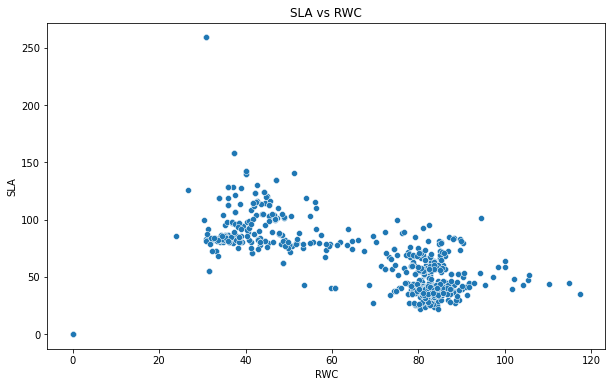

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,6))
ax = sns.scatterplot(x="RWC", y="SLA", data=df)
ax.set_title('SLA vs RWC')
plt.show()

Visualizar agrupando con una variable

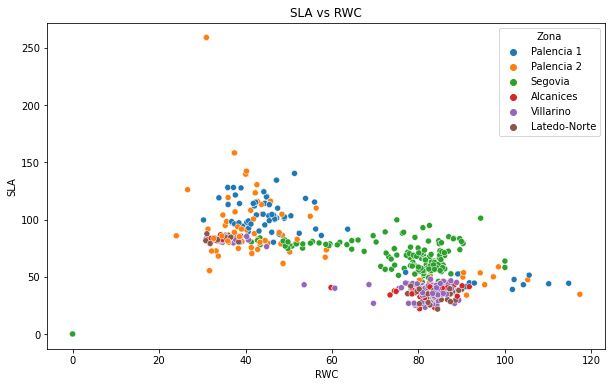

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,6))
ax = sns.scatterplot(x="RWC", y="SLA", hue='Zona',data=df)
ax.set_title('SLA vs RWC')
plt.show()

Barplot agropado por zonas

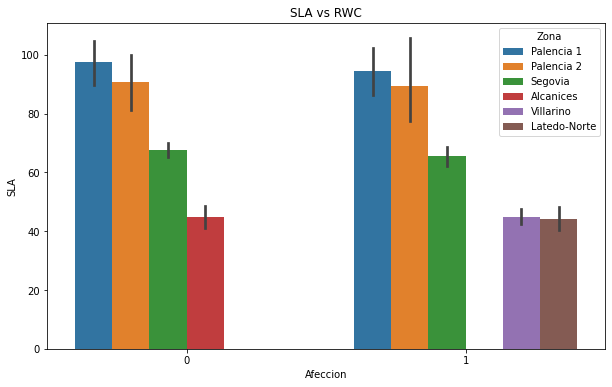

In [26]:
fig = plt.figure(figsize=(10,6))
ax = sns.barplot(x="Afeccion", y="SLA", hue='Zona',data=df)
ax.set_title('SLA vs RWC')
plt.show()

Graficar Afeccion vs md_PC1

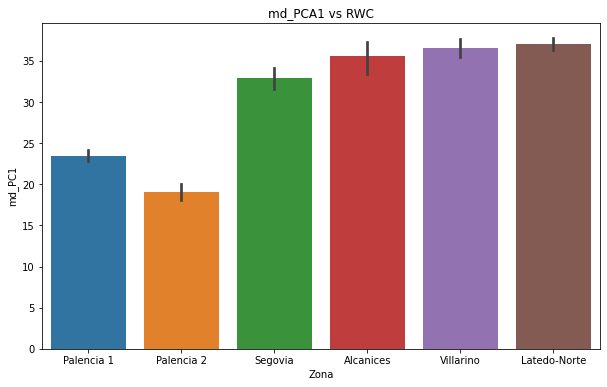

In [30]:
fig = plt.figure(figsize=(10,6))
ax = sns.barplot(x="Zona", y="md_PC1",data=df)
ax.set_title('md_PCA1 vs RWC')
plt.show()

Representar la media de las bandas según Zona

In [49]:
df_zona_bandas = df.iloc[:, np.arange(116,580,2)] # seleccionar variables de interés
df_zona_bandas['Zona'] = df['Zona'].copy()
dd = df_zona_bandas.transpose()
dd.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672
md_Banda_20,0.14311,0.14175,0.151674,0.146778,0.140392,0.142115,0.138778,0.153194,0.142759,0.147385,0.146975,0.144204,0.14966,0.14684,0.124803,0.130497,0.126905,0.126815,0.126308,0.131097,0.129692,0.130389,0.129054,0.129503,0.131874,0.131766,0.132798,0.123164,0.153103,0.15428,0.153283,0.151575,0.15317,0.151941,0.152701,0.154852,0.15403,0.154776,0.152494,0.153717,...,0.209198,0.207593,0.174911,0.179417,0.177149,0.176854,0.172878,0.171289,0.178384,0.203384,0.205647,0.206086,0.161525,0.171927,0.162588,0.167021,0.169271,0.165886,0.167782,0.207838,0.207705,0.208311,0.175379,0.173575,0.176952,0.177422,0.173445,0.176959,0.180772,0.207006,0.208001,0.205143,0.207939,0.165371,0.166104,0.164926,0.162734,0.163542,0.163315,0.160647
md_Banda_21,0.140989,0.139421,0.148749,0.143889,0.138848,0.140385,0.138153,0.15271,0.141557,0.146285,0.14487,0.142112,0.148022,0.145057,0.12333,0.129214,0.125264,0.125931,0.125169,0.129049,0.12841,0.129288,0.12806,0.128471,0.131191,0.130873,0.131965,0.121526,0.153466,0.153821,0.152235,0.15027,0.152096,0.151253,0.150777,0.155228,0.152152,0.153583,0.151746,0.152013,...,0.21009,0.207216,0.173739,0.177554,0.176797,0.17635,0.172348,0.170537,0.176698,0.204228,0.206891,0.206925,0.158718,0.169043,0.160132,0.165922,0.167644,0.164535,0.167012,0.206556,0.208675,0.209097,0.174865,0.172233,0.175754,0.176623,0.169955,0.174402,0.178518,0.208053,0.209138,0.206573,0.207052,0.163814,0.164528,0.164174,0.162486,0.163154,0.161335,0.159235
md_Banda_22,0.135661,0.133589,0.14442,0.139218,0.132055,0.133385,0.13126,0.146159,0.134667,0.13955,0.13791,0.13569,0.141887,0.1383,0.118034,0.124121,0.121323,0.120652,0.120151,0.125807,0.123703,0.124207,0.122431,0.123223,0.125754,0.125816,0.126813,0.116652,0.146462,0.146247,0.14578,0.143782,0.145646,0.143924,0.145979,0.148015,0.147367,0.147008,0.145273,0.146718,...,0.203112,0.200029,0.166969,0.172172,0.169879,0.16947,0.165429,0.16289,0.170071,0.196333,0.199141,0.199393,0.155272,0.166685,0.156839,0.160617,0.162441,0.1591,0.161719,0.20079,0.201144,0.20137,0.168135,0.165293,0.168789,0.169583,0.165805,0.169297,0.172752,0.200655,0.201855,0.198841,0.200739,0.159972,0.160755,0.158732,0.156678,0.157677,0.156269,0.153705
md_Banda_23,0.134665,0.134064,0.143948,0.138592,0.132932,0.134674,0.131316,0.147045,0.135281,0.140014,0.139454,0.136591,0.142198,0.139633,0.117669,0.124424,0.119722,0.119837,0.119049,0.124211,0.122764,0.123591,0.121945,0.122475,0.124935,0.125191,0.125963,0.115715,0.145255,0.146302,0.144111,0.142269,0.144651,0.14385,0.143704,0.147349,0.145619,0.145835,0.144176,0.144537,...,0.200561,0.197618,0.165922,0.169841,0.168576,0.16773,0.163912,0.162836,0.169676,0.193877,0.197014,0.197232,0.153592,0.164818,0.155706,0.161216,0.162957,0.160187,0.161786,0.197215,0.199072,0.199924,0.166465,0.164102,0.168203,0.16871,0.162901,0.166446,0.170456,0.198584,0.199432,0.196889,0.198118,0.158845,0.159704,0.158567,0.156929,0.157416,0.156057,0.154089
md_Banda_24,0.127415,0.125418,0.13632,0.131036,0.124115,0.126173,0.122591,0.138827,0.126606,0.13168,0.131001,0.12842,0.133944,0.13132,0.110537,0.118226,0.114231,0.113583,0.112912,0.11832,0.116689,0.117182,0.115464,0.11642,0.118686,0.119004,0.119931,0.109158,0.137978,0.138883,0.137258,0.135428,0.137532,0.136692,0.136817,0.14028,0.139714,0.139034,0.136649,0.137901,...,0.192488,0.18959,0.158726,0.163877,0.161947,0.160991,0.156766,0.155192,0.162925,0.185387,0.188012,0.188673,0.145785,0.157888,0.147724,0.152567,0.155514,0.152215,0.153767,0.18964,0.190243,0.191365,0.159791,0.156841,0.161427,0.162081,0.157141,0.160147,0.164452,0.189595,0.190858,0.18774,0.189846,0.151207,0.152249,0.150451,0.148425,0.149318,0.147867,0.145442


In [40]:
fig = plt.figure(figsize=(10,6))
ax = sns.barplot(x="Zona", y="md_PC1",data=dd)
ax.set_title('md_PCA1 vs RWC')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



array([4,
       array([116, 118, 120, 122, 124, 126, 128, 130, 132, 134, 136, 138, 140,
       142, 144, 146, 148, 150, 152, 154, 156, 158, 160, 162, 164, 166,
       168, 170, 172, 174, 176, 178, 180, 182, 184, 186, 188, 190, 192,
       194, 196, 198, 200, 202, 204, 206, 208, 210, 212, 214, 216, 218,
       220, 222, 224, 226, 228, 230, 232, 234, 236, 238, 240, 242, 244,
       246, 248, 250, 252, 254, 256, 258, 260, 262, 264, 266, 268, 270,
       272, 274, 276, 278, 280, 282, 284, 286, 288, 290, 292, 294, 296,
       298, 300, 302, 304, 306, 308, 310, 312, 314, 316, 318, 320, 322,
       324, 326, 328, 330, 332, 334, 336, 338, 340, 342, 344, 346, 348,
       350, 352, 354, 356, 358, 360, 362, 364, 366, 368, 370, 372, 374,
       376, 378, 380, 382, 384, 386, 388, 390, 392, 394, 396, 398, 400,
       402, 404, 406, 408, 410, 412, 414, 416, 418, 420, 422, 424, 426,
       428, 430, 432, 434, 436, 438, 440, 442, 444, 446, 448, 450, 452,
       454, 456, 458, 460, 462, 464, 466, 468, 

Las librerías plotly permiten generar gráficos interactivos (y luego se pueden utilizar para generar interfaces de usuario en la plataforma DASH):

In [18]:
import pandas as pd
import plotly.express as px
fig = px.scatter(df,x="RWC", y="SLA")
fig.show()

Heatmap de la correlación entre variables

In [50]:
df3 = df.iloc[:, [8,9,16,18]] # seleccionar variables de interés
df3.head()

,RWC,SLA,N,P
0,46.07,88.88,2.226,1765.0
1,48.96,101.08,1.763,2051.0
2,51.33,140.31,2.624,1986.0
3,47.23,101.27,1.732,1785.0
4,56.23,91.70,2.015,1876.0


In [51]:
df3.describe()

,RWC,SLA,N,P
count,673.000000,673.000000,673.000000,673.000000
mean,69.027137,62.239431,1.275274,1165.261540
std,20.836841,29.461688,0.686945,510.865839
min,0.000000,0.000000,0.000000,0.000000
25%,46.480000,38.840000,0.677000,738.000000
50%,80.570000,55.653351,1.153000,987.700000
75%,83.815000,82.074752,1.756869,1515.800000
max,117.328230,259.060000,3.721000,2970.000000


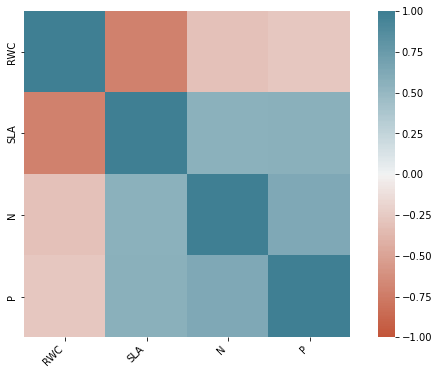

In [52]:
corr = df3.corr()

fig = plt.figure(figsize=(10,6))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

Scatterplot matrix

<Figure size 720x432 with 0 Axes>

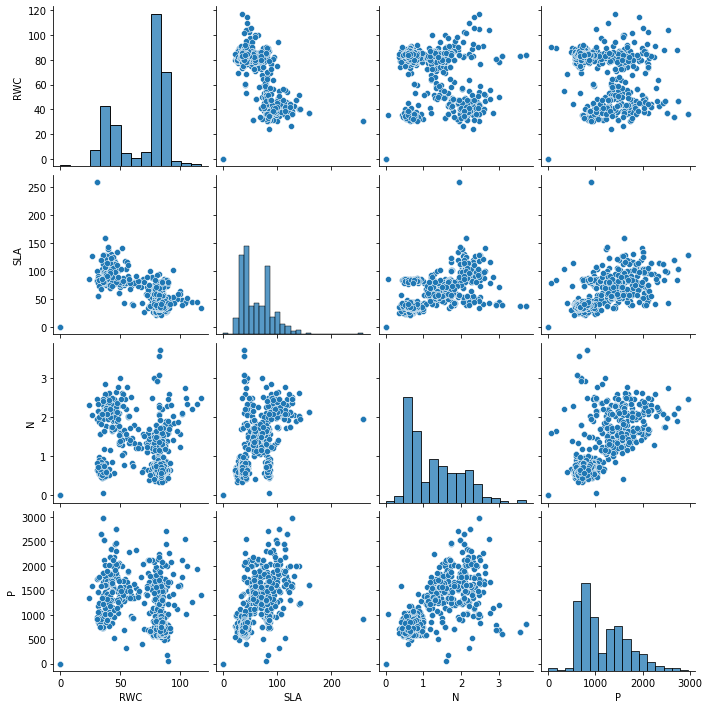

In [53]:
fig = plt.figure(figsize=(10,6))
sns.pairplot(df3)
plt.show()

### Agrupamiento de datos (Clustering)

Creamos un nuevo dataframe con las dos variables que nos interesan

In [54]:
from sklearn.cluster import KMeans

df2 = df[['SLA','RWC']]
df2.head()

,SLA,RWC
0,88.88,46.07
1,101.08,48.96
2,140.31,51.33
3,101.27,47.23
4,91.70,56.23


Aplicamos el algoritmo de agrupemiento k-means para buscar dos grupos y representamos el resultado

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



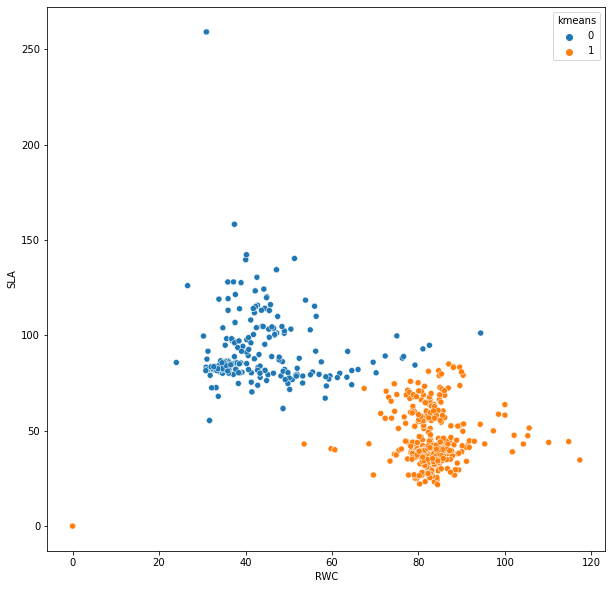

In [55]:
group = KMeans(n_clusters=2).fit_predict(df2)
df2['kmeans'] = group 
fig = plt.figure(figsize=(10,10)) 
sns.scatterplot(x="RWC", y="SLA",hue='kmeans',data=df2)
plt.show()

K-means datos 4-dimensionales

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Figure size 720x432 with 0 Axes>

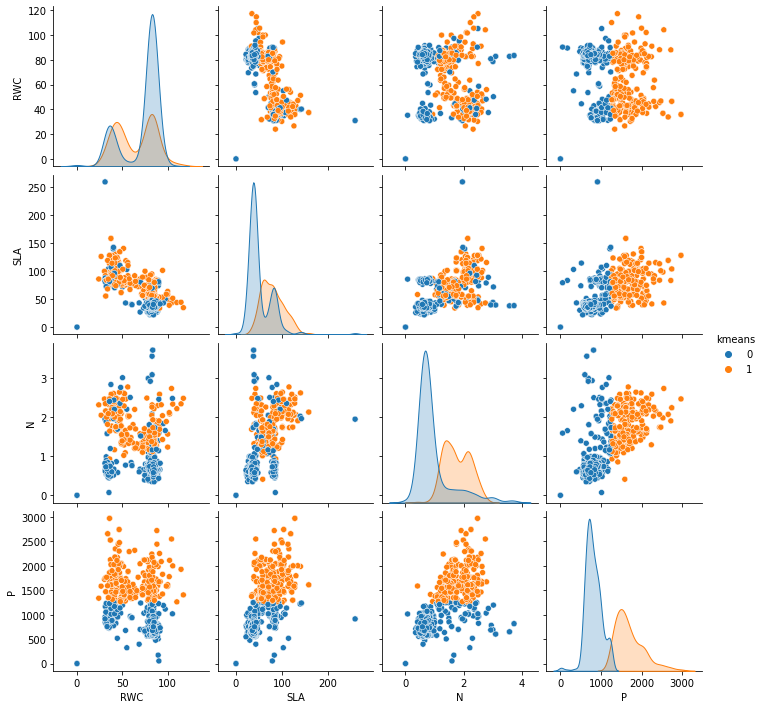

In [57]:
group = KMeans(n_clusters=2).fit_predict(df3)
df3['kmeans'] = group 
fig = plt.figure(figsize=(10,6))
sns.pairplot(df3,hue='kmeans')
plt.show()

## Modelos de regresión univariada

### Linear univariate regression

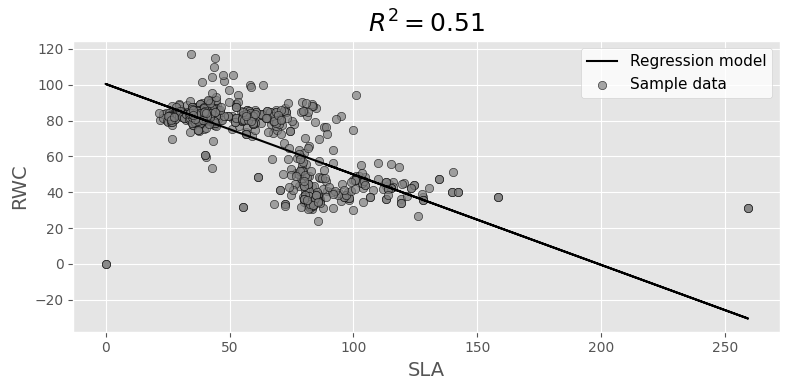

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

######################################## Data preparation #########################################

X = df3[['SLA']].values.reshape(-1,1) ## X are the input variables (or independent variables)
y = df3["RWC"].values ## Y is the output/dependent variable

################################################ Train #############################################

ols = linear_model.LinearRegression()
model = ols.fit(X, y) #ajustar el modelo
response = model.predict(X) # predecir

############################################## Evaluate ############################################

r2 = model.score(X, y)

############################################## Plot ################################################

plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(X, response, color='k', label='Regression model')
ax.scatter(X, y, edgecolor='k', facecolor='grey', alpha=0.7, label='Sample data')
ax.set_ylabel('RWC', fontsize=14)
ax.set_xlabel('SLA', fontsize=14)
ax.legend(facecolor='white', fontsize=11)
ax.set_title('$R^2= %.2f$' % r2, fontsize=18)

fig.tight_layout()

In [ ]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.511
Model:                            OLS   Adj. R-squared:                  0.510
Method:                 Least Squares   F-statistic:                     701.6
Date:                Sun, 17 Oct 2021   Prob (F-statistic):          2.27e-106
Time:                        05:44:06   Log-Likelihood:                -2757.3
No. Observations:                 673   AIC:                             5519.
Df Residuals:                     671   BIC:                             5528.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        100.4979      1.314     76.461      0.0

The same can be done with the statsmodels libraries in a similar way

In [60]:
import statsmodels.api as sm # import statsmodels 

X = df3[['SLA']].values.reshape(-1,1) ## X are the input variables (or independent variables)
y = df3["RWC"].values ## Y is the output/dependent variable
X = sm.add_constant(X) # Add constant to have a constant coeficient in the regression equation

model = sm.OLS(y, X).fit() 
predictions = model.predict(X)
r2 = model.rsquared
print(model.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.511
Model:                            OLS   Adj. R-squared:                  0.510
Method:                 Least Squares   F-statistic:                     701.6
Date:                Mon, 18 Oct 2021   Prob (F-statistic):          2.27e-106
Time:                        09:22:42   Log-Likelihood:                -2757.3
No. Observations:                 673   AIC:                             5519.
Df Residuals:                     671   BIC:                             5528.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        100.4979      1.314     76.461      0.0

Visualize result

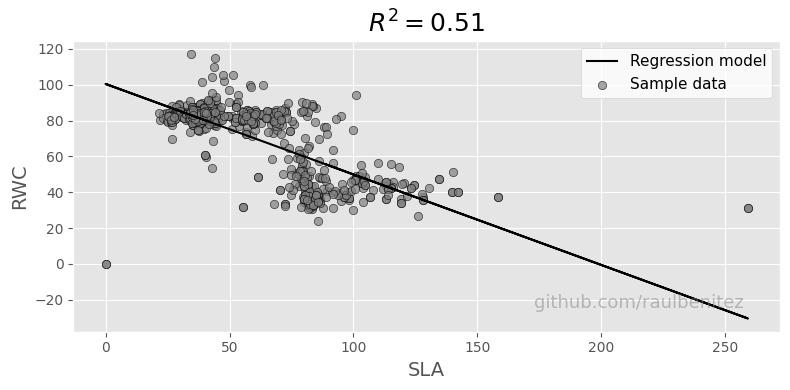

In [61]:
plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8, 4))

X = df3[['SLA']].values.reshape(-1,1) ## X are the input variables (or independent variables)
y = df3["RWC"].values ## Y is the output/dependent variable

ax.plot(X, predictions, color='k', label='Regression model')
ax.scatter(X, y, edgecolor='k', facecolor='grey', alpha=0.7, label='Sample data')
ax.set_ylabel('RWC', fontsize=14)
ax.set_xlabel('SLA', fontsize=14)
ax.text(0.8, 0.1, 'github.com/raulbenitez', fontsize=13, ha='center', va='center',
         transform=ax.transAxes, color='grey', alpha=0.5)
ax.legend(facecolor='white', fontsize=11)
ax.set_title('$R^2= %.2f$' % r2, fontsize=18)

fig.tight_layout()

### Regresión no-lineal y selección de modelos

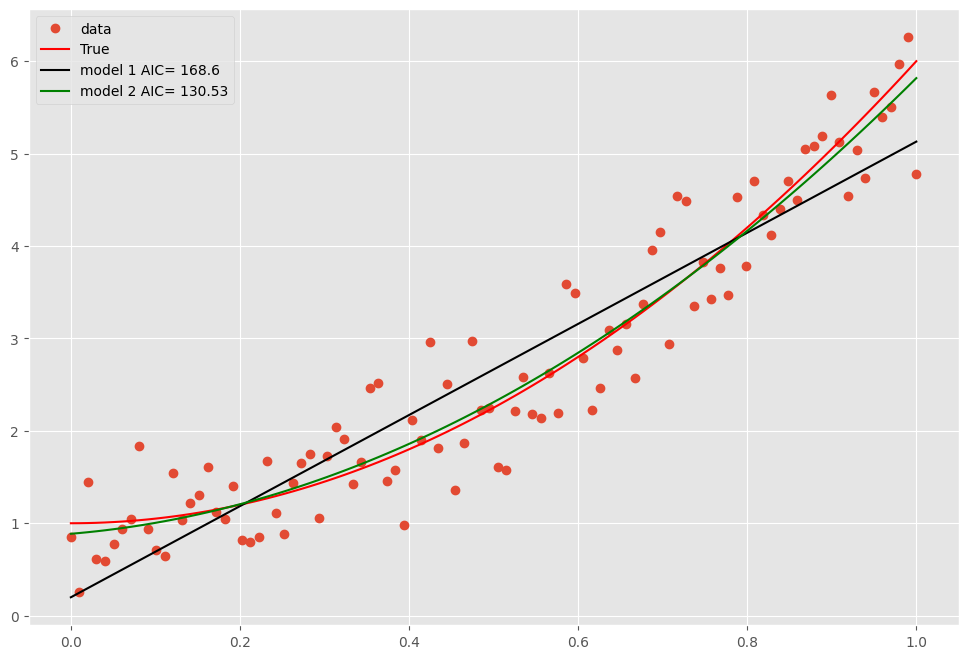

In [63]:
# Generacion datos sintéticos:
nsample = 100
x = np.linspace(0, 1, nsample)
beta = np.array([1, 5])
sig = 0.5
e = np.random.normal(size=nsample)

X = sm.add_constant(x) # adds a first column with ones
y_true = np.dot(X**2, beta)
y = y_true + sig*e

# ajuste del modelo:
model1 = sm.OLS(y, X)
results1 = model1.fit()

X2 = np.column_stack((x, x**2))
X2 = sm.add_constant(X2) # adds a first column with ones
model2 = sm.OLS(y, X2)
results2 = model2.fit()

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, y, 'o', label="data")
ax.plot(x, y_true, 'r-', label="True")
ax.plot(x, results1.fittedvalues, 'k-', label="model 1 AIC= {:.5}".format(results1.aic))
ax.plot(x, results2.fittedvalues, 'g-', label="model 2 AIC= {:.5}".format(results2.aic))
ax.legend()
plt.show()

### Univariate Decision Trees Regression 

Some advantages of decision trees are:

* Simple to understand and to interpret. Trees can be visualised.

* Requires little data preparation. Other techniques often require data normalisation, dummy variables need to be created and blank values to be removed. Note however that this module does not support missing values.

* The cost of using the tree (i.e., predicting data) is logarithmic in the number of data points used to train the tree.

* Able to handle both numerical and categorical data. However scikit-learn implementation does not support categorical variables for now. Other techniques are usually specialised in analysing datasets that have only one type of variable. See algorithms for more information.

* Able to handle multi-output problems.

* Uses a white box model. If a given situation is observable in a model, the explanation for the condition is easily explained by boolean logic. By contrast, in a black box model (e.g., in an artificial neural network), results may be more difficult to interpret.

* Possible to validate a model using statistical tests. That makes it possible to account for the reliability of the model.

* Performs well even if its assumptions are somewhat violated by the true model from which the data were generated.

The disadvantages of decision trees include:

* Decision-tree learners can create over-complex trees that do not generalise the data well. This is called overfitting. Mechanisms such as pruning, setting the minimum number of samples required at a leaf node or setting the maximum depth of the tree are necessary to avoid this problem.

* Decision trees can be unstable because small variations in the data might result in a completely different tree being generated. This problem is mitigated by using decision trees within an ensemble.

* Predictions of decision trees are neither smooth nor continuous, but piecewise constant approximations as seen in the above figure. Therefore, they are not good at extrapolation.

* The problem of learning an optimal decision tree is known to be NP-complete under several aspects of optimality and even for simple concepts. Consequently, practical decision-tree learning algorithms are based on heuristic algorithms such as the greedy algorithm where locally optimal decisions are made at each node. Such algorithms cannot guarantee to return the globally optimal decision tree. This can be mitigated by training multiple trees in an ensemble learner, where the features and samples are randomly sampled with replacement.

* There are concepts that are hard to learn because decision trees do not express them easily, such as XOR, parity or multiplexer problems.

* Decision tree learners create biased trees if some classes dominate. It is therefore recommended to balance the dataset prior to fitting with the decision tree.

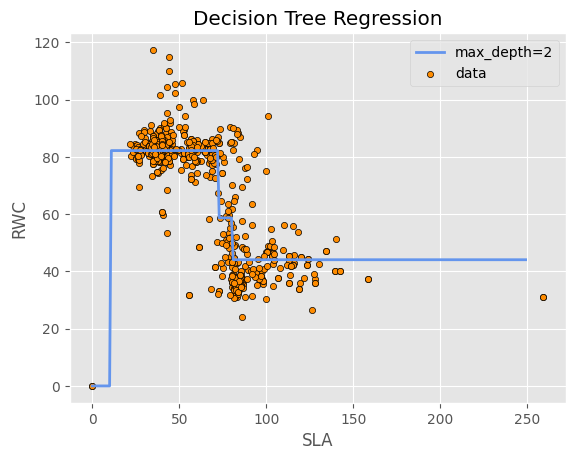

In [ ]:
# Import the necessary modules and libraries
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Fit regression model
X = df3[['SLA']] ## X are the input variables (or independent variables)
y = df3["RWC"].values ## Y is the output/dependent variable

regr_1 = DecisionTreeRegressor(max_depth=2)
regr_1.fit(X, y)

# Predict:
X_test = np.arange(0.0, 250, 1)[:, np.newaxis]
y_1 = regr_1.predict(X_test)


# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.xlabel("SLA")
plt.ylabel("RWC")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

### Logistic regression (categorical response variables)

In [ ]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

X = df3[['SLA']] ## X are the input variables (or independent variables)
y = df[['Afeccion']].values.ravel() ## y output variable

clf = LogisticRegression(random_state=0).fit(X, y)
clf.score(X, y)


0.6463595839524517

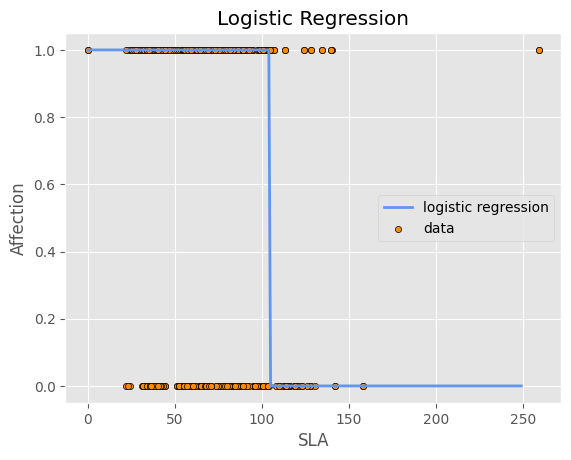

In [ ]:
# Predict:
X_test = np.arange(0.0, 250, 1)[:, np.newaxis]
y_1 = clf.predict(X_test)


# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="logistic regression", linewidth=2)
plt.xlabel("SLA")
plt.ylabel("Affection")
plt.title("Logistic Regression")
plt.legend()
plt.show()

## Modelos de regresión multivariada

### Regresión lineal multivariada

In [ ]:
df3.columns

Index(['RWC', 'SLA', 'N', 'P'], dtype='object')

In [ ]:
import statsmodels.api as sm # import statsmodels 

X = df3[['N','P','SLA']].values.reshape(-1,3) ## X are the input variables (or independent variables)
Y = df3["RWC"].values ## Y is the output/dependent variable
X = sm.add_constant(X) 

model = sm.OLS(Y, X).fit() 
predictions = model.predict(X)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     267.6
Date:                Sun, 17 Oct 2021   Prob (F-statistic):          4.43e-114
Time:                        06:02:22   Log-Likelihood:                -2732.9
No. Observations:                 673   AIC:                             5474.
Df Residuals:                     669   BIC:                             5492.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         95.3903      1.459     65.395      0.0

Visualización

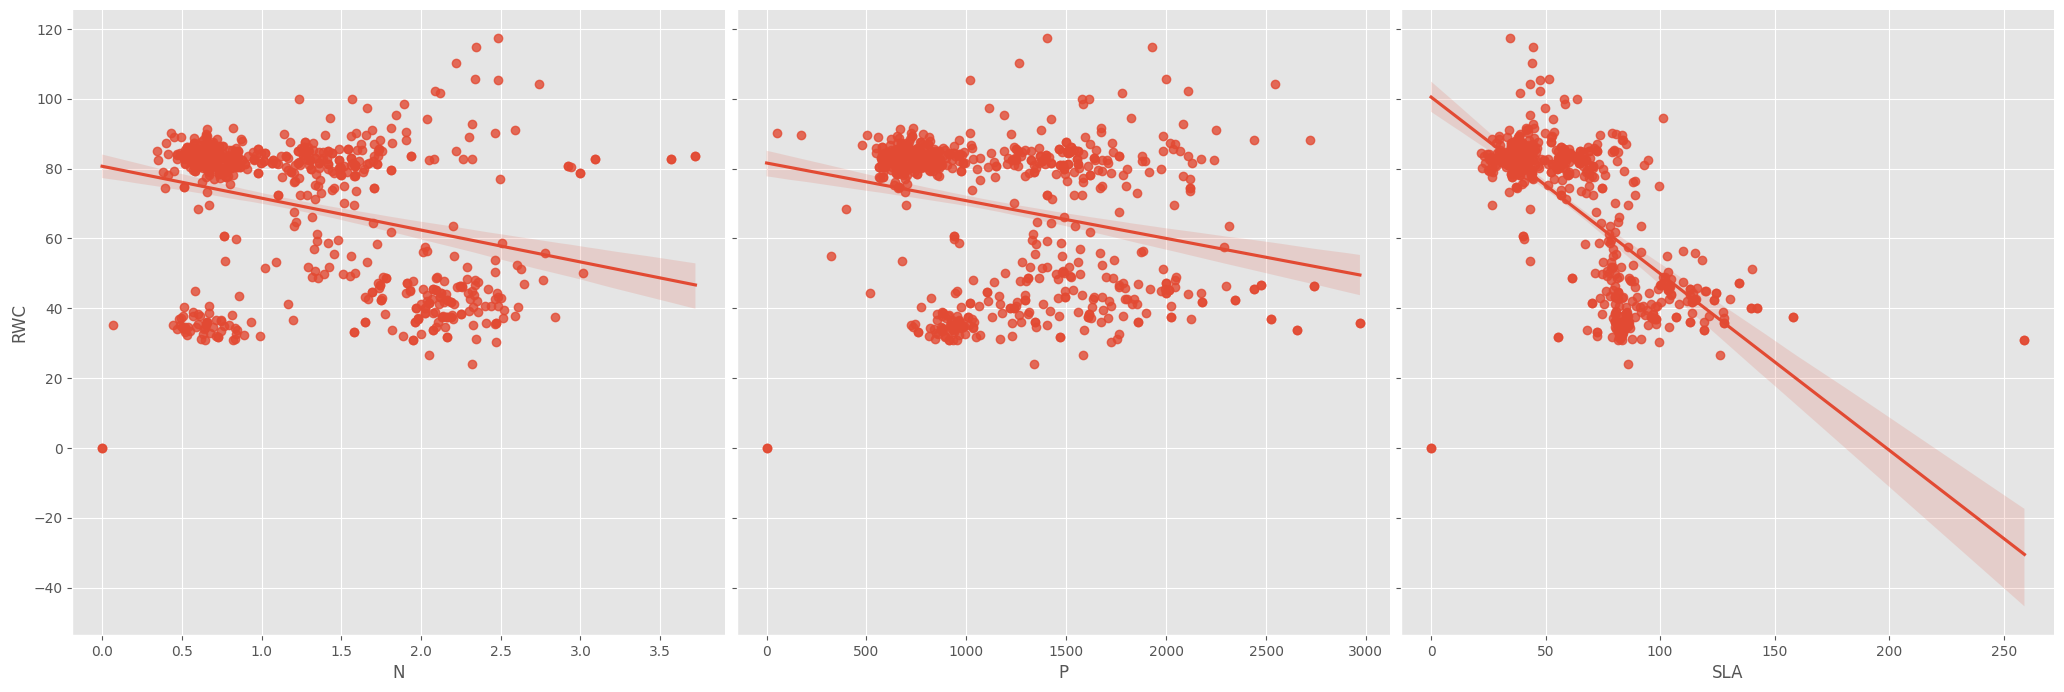

In [ ]:
import matplotlib.pyplot as plt
sns.pairplot(df3, kind="reg",x_vars=['N','P','SLA'],y_vars=["RWC"],height=7)
plt.show()

Visualize in 3D:

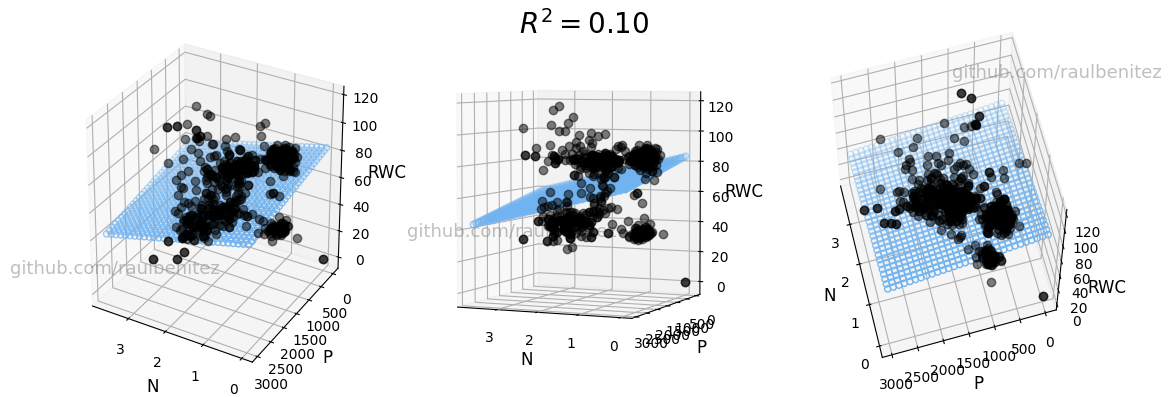

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

X = df3[['N','P']].values.reshape(-1,2) ## X are the input variables (or independent variables)
Y = df3["RWC"].values ## Y is the output/dependent variable

# Define variables to visualize
x = X[:,0]
y = X[:,1]
z = Y

# Define mesh to predict using model
x_pred = np.linspace(x.min(), x.max(), 30)   # range of porosity values
y_pred = np.linspace(y.min(), y.max(), 30)  # range of brittleness values
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T


################################################ Train #############################################

ols = linear_model.LinearRegression()
model = ols.fit(X, Y)
predicted = model.predict(model_viz)

############################################## Evaluate ############################################

r2 = model.score(X, Y)

############################################## Plot ################################################

plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('N', fontsize=12)
    ax.set_ylabel('P', fontsize=12)
    ax.set_zlabel('RWC', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.text2D(0.2, 0.32, 'github.com/raulbenitez', fontsize=13, ha='center', va='center',
           transform=ax1.transAxes, color='grey', alpha=0.5)
ax2.text2D(0.3, 0.42, 'github.com/raulbenitez', fontsize=13, ha='center', va='center',
           transform=ax2.transAxes, color='grey', alpha=0.5)
ax3.text2D(0.85, 0.85, 'github.com/raulbenitez', fontsize=13, ha='center', va='center',
           transform=ax3.transAxes, color='grey', alpha=0.5)

ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)

fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

fig.tight_layout()


### Inspección del modelos de regresión

Residuals vs fitted values : Become suspicious when the residuals grow as a function of predicted value (Heteroscedasticity). Observing a ‘bowed’ pattern indicates that the model makes systematic errors whenever it is making unusually large or small predictions therefore indicating presence of nonlinear patterns in the data (nonlinearity). 

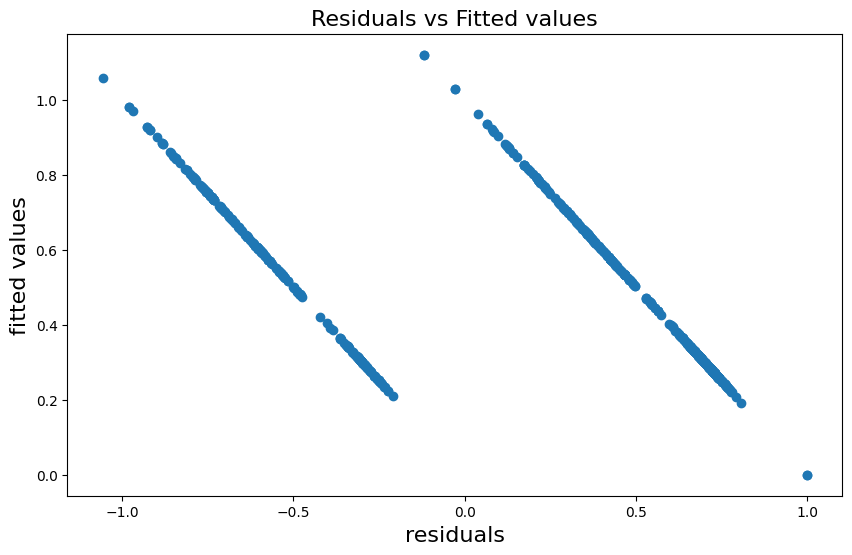

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm


X = df3[['N','P']].values.reshape(-1,2) ## X are the input variables (or independent variables)
Y = df3["RWC"].values ## Y is the output/dependent variable

model = sm.OLS(y, X)
results = model.fit()

fig = plt.figure(figsize=(10,6))
plt.scatter(results.resid,results.fittedvalues)
plt.title('Residuals vs Fitted values',fontsize=16)
plt.ylabel('fitted values',fontsize=16)
plt.xlabel('residuals',fontsize=16)
plt.show()

Residuals vs explanatory variables

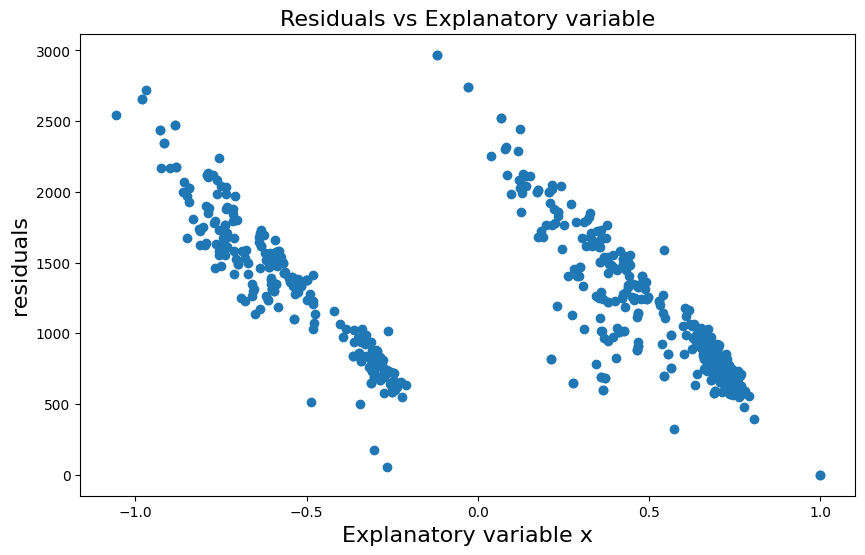

In [ ]:
fig = plt.figure(figsize=(10,6))
plt.scatter(results.resid,model.exog[:,1])
plt.title('Residuals vs Explanatory variable',fontsize=16)
plt.xlabel('Explanatory variable x',fontsize=16)
plt.ylabel('residuals',fontsize=16)
plt.show()

**Testing heteroscedasticity**: The Breusch-Pagan Lagrange Multiplier test for heteroscedasticity.

Tests the hypothesis that the residual variance does not depend on the variables in x.

https://www.statsmodels.org/stable/generated/statsmodels.stats.diagnostic.het_breuschpagan.html

https://en.wikipedia.org/wiki/Breusch%E2%80%93Pagan_test
        

In [ ]:
lm,lmp,f,fp = sm.stats.diagnostic.het_breuschpagan(results.resid,model.exog)
print('Lagrange multiplier p-value = {}'.format(lmp))
print('F-score p-value = {}'.format(fp))

Lagrange multiplier p-value = 1.6104784323244337e-87
F-score p-value = 1.2138809546077286e-128


Residuals vs normal deviates (q-q plot): Residuals shoud be normally distributed

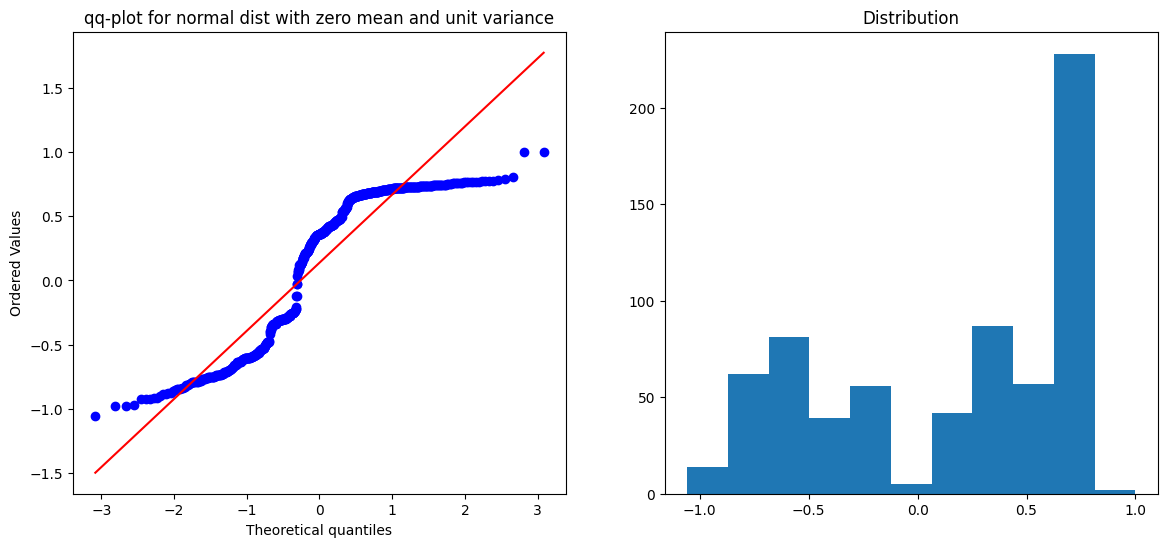

In [ ]:
import scipy.stats as stats
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(121)
res = stats.probplot(results.resid, dist=stats.norm, sparams=(0,1), plot=ax)
ax.set_title("qq-plot for normal dist with zero mean and unit variance")
ax1 = fig.add_subplot(122)
plt.hist(results.resid, bins='auto')
ax1.set_title("Distribution")
plt.show()

Model inspection plots included in the statsmodels library:

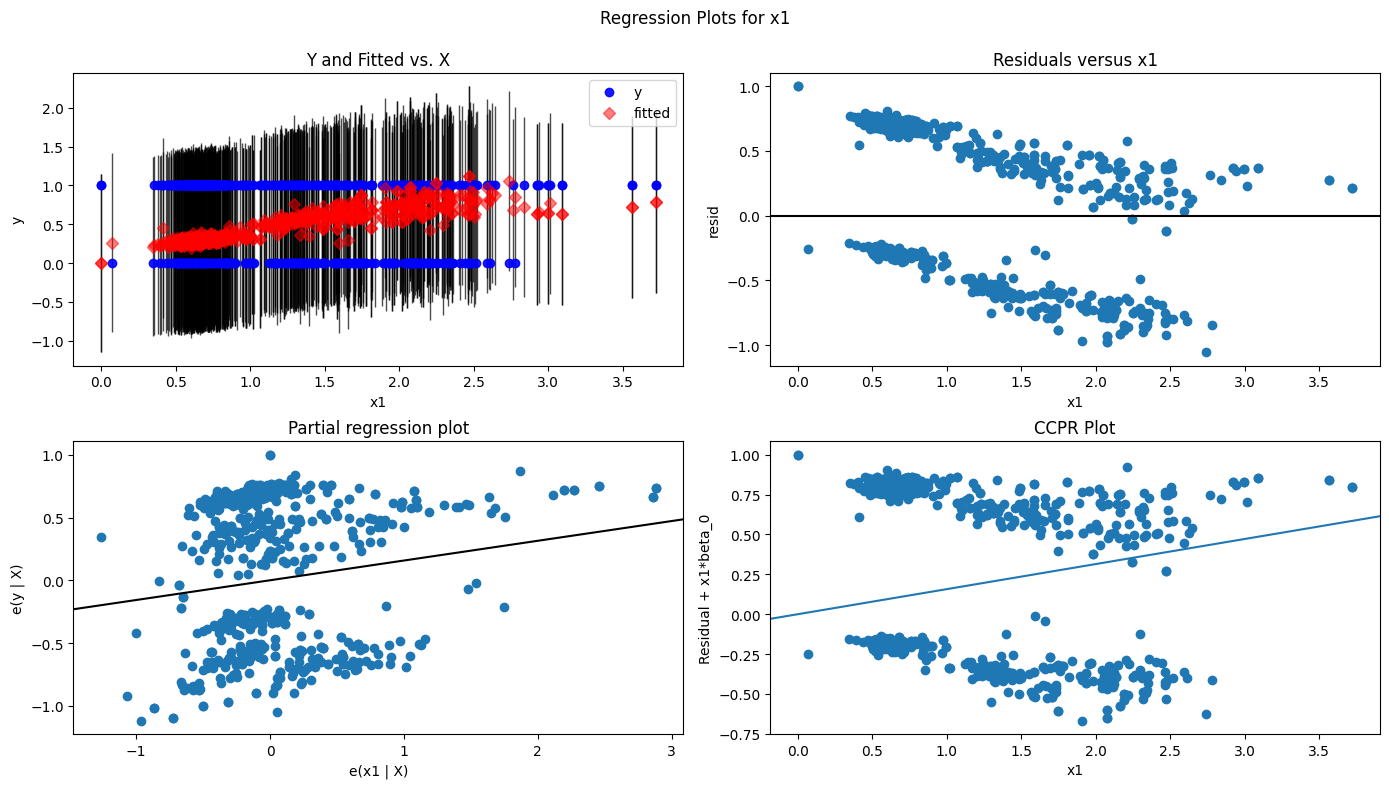

In [ ]:
fig = plt.figure(figsize=(14,8))
fig = sm.graphics.plot_regress_exog(results, "x1", fig=fig)

## Técnicas de selección de atributos

https://scikit-learn.org/stable/modules/feature_selection.html#feature-selection

### Correlation heatmap

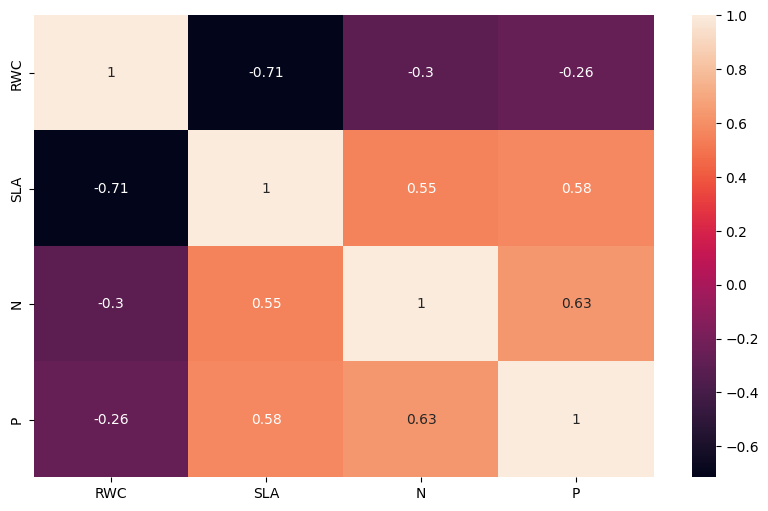

In [ ]:
plt.figure(figsize= (10, 6))
sns.heatmap(df3.corr(),annot= True)
plt.show()

### K best feature selector

Select features according to the k highest scores of a certain test: In this example, the method computes chi-squared stats between each non-negative feature and class.

This score can be used to select the n_features features with the highest values for the test chi-squared statistic from X, which must contain only non-negative features such as booleans or frequencies (e.g., term counts in document classification), relative to the classes.


Other methods available as a performance scores:
- f_classif
ANOVA F-value between label/feature for classification tasks.

- mutual_info_classif
Mutual information for a discrete target.

- chi2
Chi-squared stats of non-negative features for classification tasks.

- f_regression
F-value between label/feature for regression tasks.

- mutual_info_regression
Mutual information for a continuous target.

- SelectPercentile
Select features based on percentile of the highest scores.

- SelectFpr
Select features based on a false positive rate test.

- SelectFdr
Select features based on an estimated false discovery rate.

- SelectFwe
Select features based on family-wise error rate.

- GenericUnivariateSelect
Univariate feature selector with configurable mode.

De entre las variables ['N','P','SLA'], cuál es la que mejor predice el valor de la variable 'Afección'?

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

X = df[['N','P','SLA']].values.reshape(-1,3) ## X are the input variables (or independent variables)
y = df['Afeccion'].values ## Y should be a ctegorical variable to predict

feat_sel1 = SelectKBest(chi2, k=1) # define el metodo
feat_sel1.fit(X, y) # ajustar el método/entrenar

X_new = feat_sel1.transform(X) # Proyectar los datos en la variable seleccionada

In [ ]:
feat_sel1.scores_

array([5.08906996e+00, 9.48517703e+03, 2.89566881e+02])

In [ ]:
feat_sel1.get_support()

array([False,  True, False])

### Recursive Feature Elimination (RFE) 

Given a set of training features and a classifier, the method recursively evaluates the performance of the method when removing some features and finally provides a reduced set of features that provide minimum loss of performance:

In [ ]:
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt


X = df[['N','P','SLA']].values.reshape(-1,3) ## X are the input variables (or independent variables)
y = df['Afeccion'].values ## Y should be a ctegorical variable to predict


# Create the RFE object 
svc = SVC(kernel="linear", C=1) 
# clf = tree.DecisionTreeClassifier()
rfe = RFE(estimator=svc, n_features_to_select=1, step=1)
rfe.fit(X, y)
print('Mantained features: {}'.format(rfe.support_))
print('Ranking of features: {}'.format(rfe.ranking_))


Mantained features: [ True False False]
Ranking of features: [1 3 2]


## Visualización de datos multidimensionales

### t-distributed Stochastic Neighbor Embedding (t-SNE):

A nonlinear projection of in a low dimensional space. The mapping is obtained by minimizing the Kullback-Leibler divergence between the joint probabilities of the low-dimensional projection and the high-dimensional observations. 

Let's consider a set of N d-dimensional observations $\{\vec{x}_1, \vec{x}_2, \cdots, \vec{x}_N\}$. 

We model the conditional probability that $\vec{x}_j$ is taken as neighbor of $\vec{x}_i$ by a normal distribution centered at $\vec{x}_i$:

$p_{j|i} = \frac{\exp\{-|\vec{x}_i-\vec{x}_j|^2/2\sigma^2_j\}}{\sum_{k\neq i} \exp\{-|\vec{x}_i-\vec{x}_j|^2/2\sigma^2_j\}}$

That converts similarities between data points to joint probabilities 

$p_{ij} = \frac{1}{2N}(p_{j|i}+p_{i|j})$

The low-dimensional map is then defined as a sequence of N points in a lower-dimension $\tilde{d}$ $\{\vec{y}_1, \vec{y}_2, \cdots, \vec{y}_N\}$. Let's define an equivalent joint probability at the low-dimensional space as

$q_{ij} = \frac{(1+|\vec{x}_i-\vec{x}_j|^2)^{-1}}{\sum_{k}\sum_{l\neq k}(1+|\vec{x}_k-\vec{x}_l|^2)^{-1}}$
 
 
The map is found by minimizing the Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data

$KL(P|Q) = \sum_{i \neq j} p_{ij} log \frac{p_{ij}}{q_{ij}}$


In order to get familiar with the parameters and to get some insight about how to use this techinque please refer to 

https://distill.pub/2016/misread-tsne/

https://scikit-learn.org/stable/auto_examples/manifold/plot_t_sne_perplexity.html#sphx-glr-auto-examples-manifold-plot-t-sne-perplexity-py





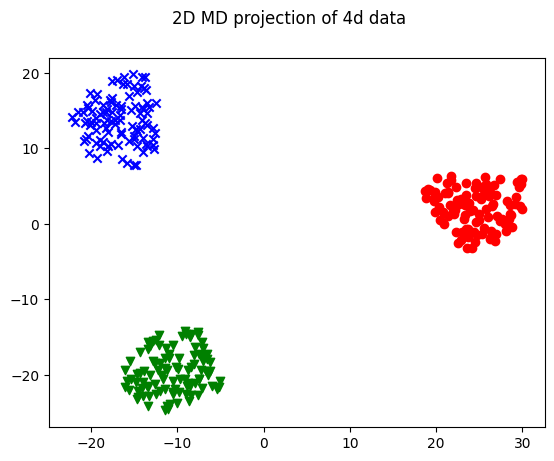

In [ ]:
import numpy as np
import pylab as py

from sklearn import manifold
from sklearn.metrics import euclidean_distances

seed = np.random.RandomState(seed=3)

# Generate 4d random synthetic data (N variables x M observations):
N = 4
M = 300

M3 = int(round(M/3))
X1 = 10 + 2*np.random.randn(M3,N) # cluster 1 (medium dispersion)
X2 = -10 + 5*np.random.randn(M3,N) # cluster 2 (high dispersion)
X3 = 1*np.random.randn(M3,N) # cluster 3 (low dispersion)

A = np.concatenate((X1,X2,X3))

# Apply t-SNE algorithm:
n_components = 2
perplexity = 30
tsne = manifold.TSNE(n_components=n_components, init='random', random_state=0, perplexity=perplexity)
pos = tsne.fit_transform(A)

# Represent data in the 2D MDS projection:
fig1 = py.figure()
for i in range(0,M3,1):
    py.scatter(pos[i][0],pos[i][1],marker='o',c='r')
for i in range(M3,2*M3,1):
    py.scatter(pos[i][0],pos[i][1],marker='v',c='g')
for i in range(2*M3,M,1):
    py.scatter(pos[i][0],pos[i][1],marker='x',c='b')
fig1.suptitle('2D MD projection of 4d data')
py.show()

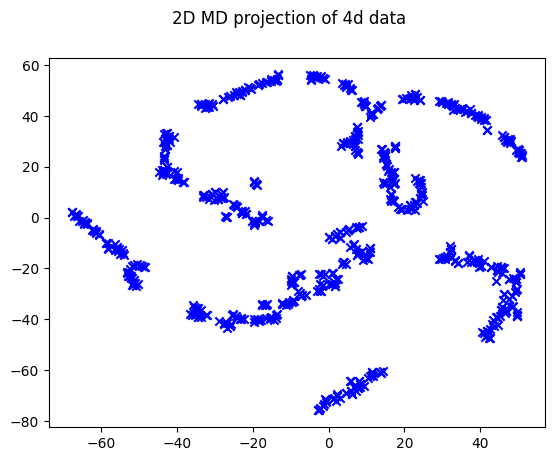

In [ ]:
X = df[['N','P','SLA','RWC']].values.reshape(-1,4) ## X are the input variables (or independent variables)

# Apply t-SNE algorithm:
n_components = 2
perplexity = 10
tsne = manifold.TSNE(n_components=n_components, init='random', random_state=0, perplexity=perplexity)
pos = tsne.fit_transform(X)

# Represent data in the 2D MDS projection:
fig1 = py.figure()
py.scatter(pos[:,0],pos[:,1],marker='x',c='b')
fig1.suptitle('2D MD projection of 4d data')
py.show()

## Métodos de clasificación supervisada

### NAÏVE BAYES

Assume that features $x_j$ in observation $\vec{x}$ are class-independent. Then the likelihood function factorizes as:
\begin{equation*}
p(\vec{x}|\omega_i) = \prod_{j=1}^d p(x_i|\omega_i)
\end{equation*}
We can select the distribution function that follows each feature, either discrete or continous, thus providing a very flexible method. \\
Choosing univariate normal distributions for each feature $x_j \sim N(x_j|\mu_i,\sigma_i^2), j=1,\dots d$, the discriminant function $g_i(\vec{x})$ is: 

\begin{equation*}
g_i(\vec{x}) = -\frac{d}{2}\log 2\pi -d \log \sigma_i - \frac{1}{2\sigma_i}\sum_{i=1}^d (x_j-\mu_i)^2 + \log p(\omega_i)
\end{equation*}


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

X = df[['N','P','SLA']].values.reshape(-1,3) ## X are the input variables (or independent variables)
y = df['Afeccion'].values ## Y should be a ctegorical variable to predict

gnb = GaussianNB()
y_pred = gnb.fit(X, y).predict(X)

confusion_matrix(y, y_pred)

array([[113, 139],
       [ 94, 327]])

### Decision Trees



In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn import tree

clf = tree.DecisionTreeClassifier()
y_pred = clf.fit(X, y).predict(X)

confusion_matrix(y, y_pred)

array([[252,   0],
       [  0, 421]])

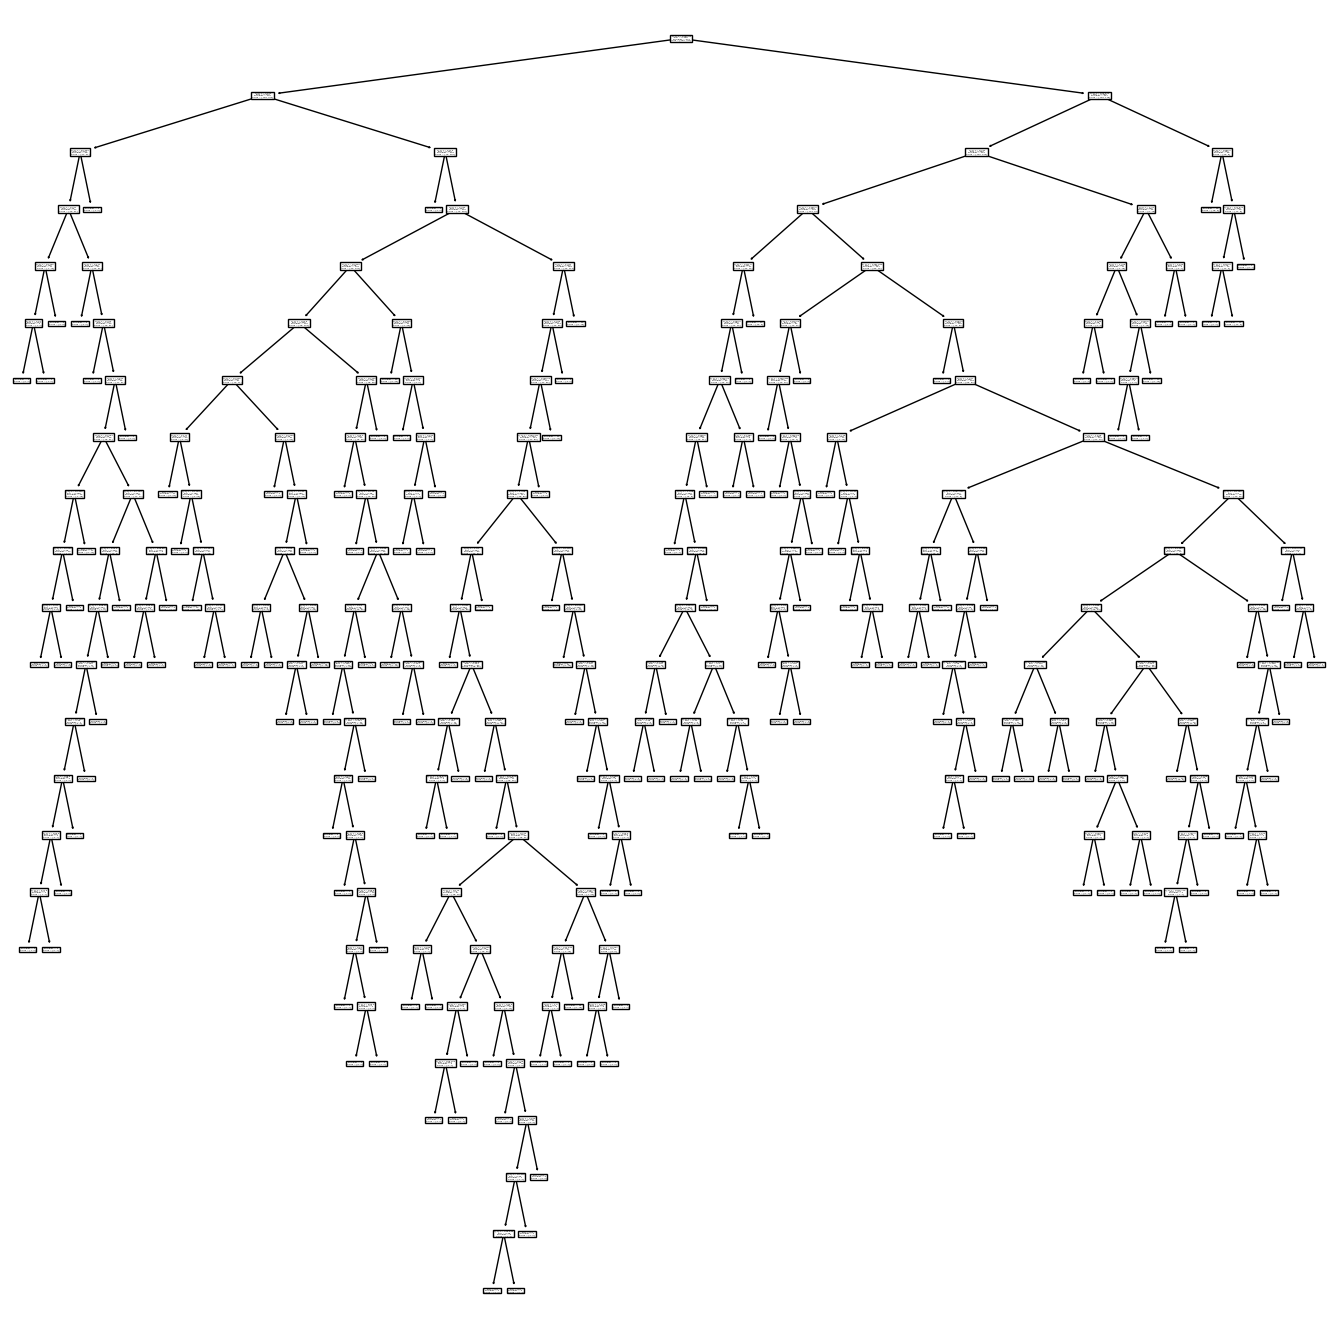

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(17,17))
ax = plot_tree(clf.fit(X,y)) 
plt.show()

### Train and test subsets

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,train_size=0.7)

clf = tree.DecisionTreeClassifier()
y_pred_test = clf.fit(X_train, y_train).predict(X_test)

confusion_matrix(y_test, y_pred_test)

array([[40, 33],
       [32, 97]])

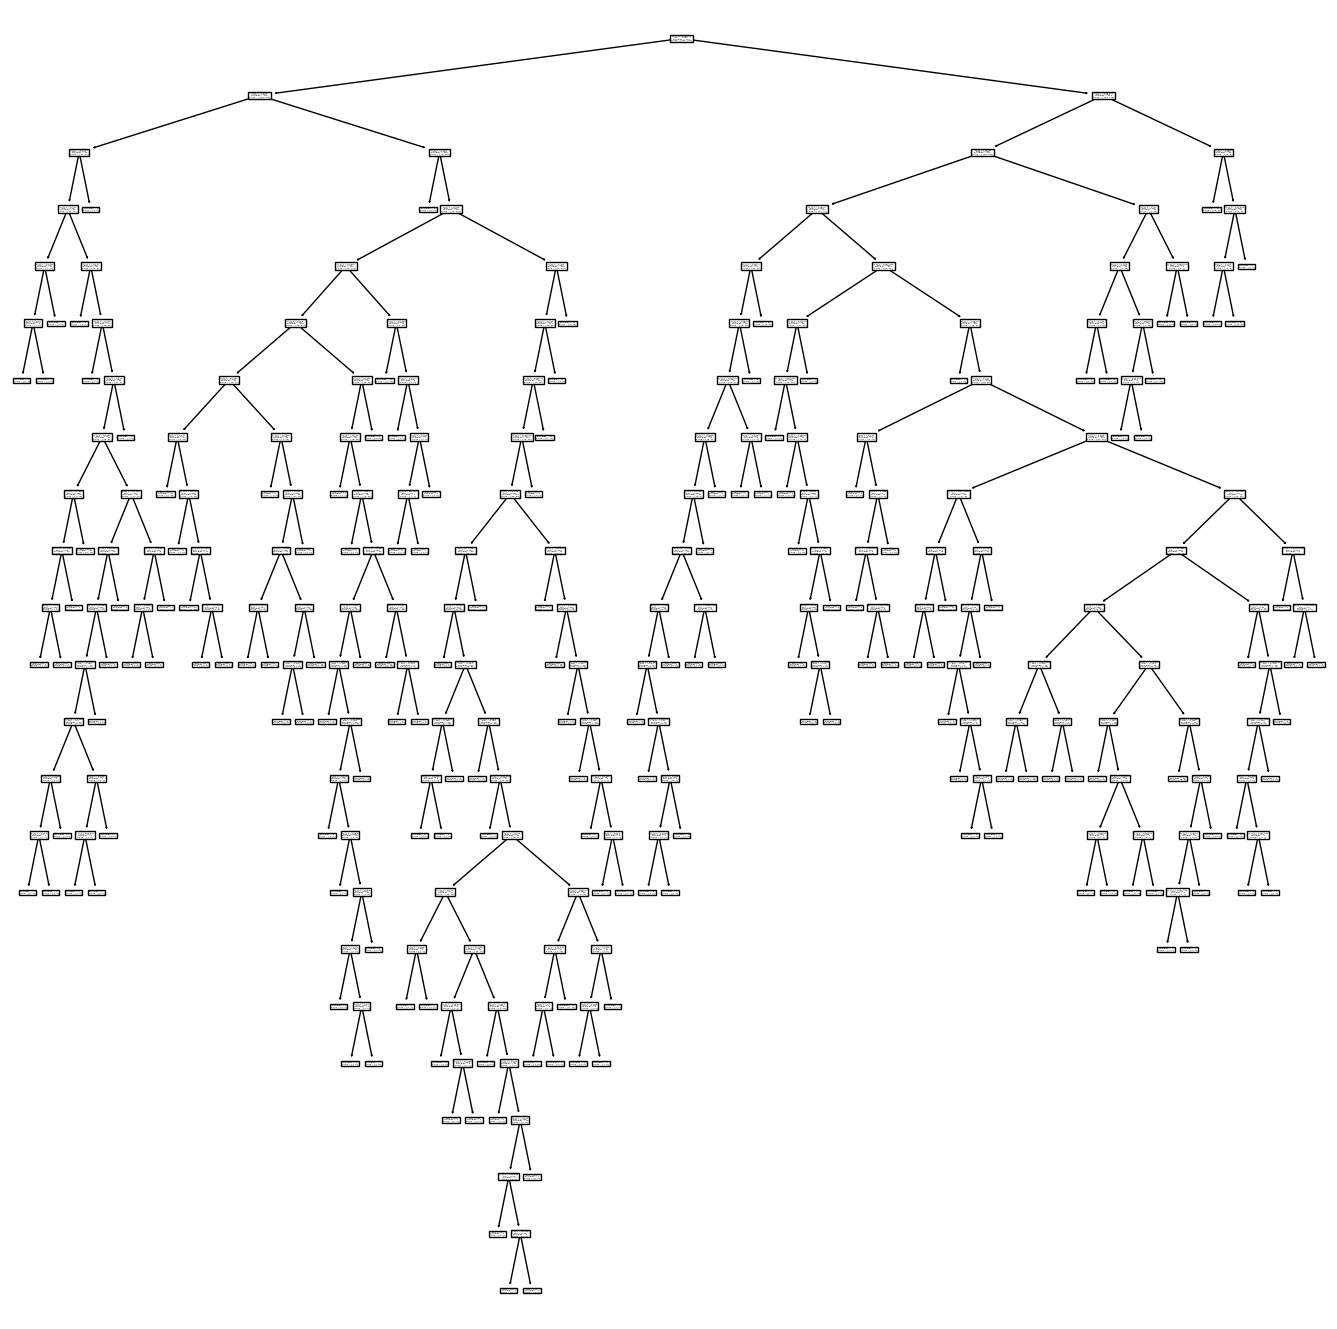

In [ ]:
plt.figure(figsize=(17,17))
ax = plot_tree(clf.fit(X,y)) 
plt.show()